# Data Analysis and Visualization for YayYay Payment Processing

## Introduction

YayYay is a payment processing company based in Japan that began its operations in 2019. The company processes a substantial number of transactions and aims to analyze these transactions to gain valuable insights. This analysis focuses on exploring and visualizing various aspects of transaction data to understand business trends and customer behavior.

The datasets provided for this analysis include:

	•	Transactions Data: Contains information about transactions such as user ID, store ID, transaction date and time, and transaction amount.
	•	Users Data: Includes user characteristics such as gender and age.
	•	Stores Data: Provides details about each store, including its prefecture, local administrative area, and location.

## Overview

The following analysis will cover

	1.	Data Loading and Preparation:
		•	Import necessary libraries and load the datasets.
		•	Perform initial data inspection to understand the structure and contents of each dataset.
	2.	Exploratory Data Analysis (EDA):
		•	Analyze the distribution of transaction amounts.
		•	Handle missing values in the user records.
		•	Explore the distribution of stores by prefecture and local administrative area.
	3.	Transactions Over Time:
		•	Visualize how transactions are distributed over different time periods: daily, monthly, quarterly, and yearly.
		•	Plot GMV (Gross Merchandise Value) trends to identify patterns and anomalies.
	4.	Transactions Per User and Per Store:
		•	Analyze GMV distribution across different users and stores.
		•	Visualize the GMV by store and user to understand their contributions to overall sales.
	5.	GMV by Age Group:
		•	Categorize users into age groups and analyze GMV distribution across these age groups.
		•	Create detailed visualizations to highlight differences in spending behavior among various age groups.

## Step 1: Load and Prepare Data

### 1.1 Import Libraries

In [73]:
import pandas as pd

# Set display options to show maximum columns and rows
pd.set_option('display.max_columns', None)  # Show all columns
pd.set_option('display.max_rows', None)     # Show all rows

import matplotlib.pyplot as plt
import seaborn as sns

### 1.2 Load Data

#### Load the datasets into DataFrames.

In [ ]:
# Load the datasets
transactions = pd.read_csv('./input_data/transactions.csv')
users = pd.read_csv('./input_data/users.csv')
stores = pd.read_csv('./input_data/stores.csv')

## Step 2: Exploratory Data Analysis (EDA)

1. Basic Statistics and Data Overview
### Transactions Data Analysis
Let’s start by getting an overview of the dataset:



In [46]:
# Check the data types
transactions.dtypes

id                  object
user_id             object
store_id            object
event_occurrence    object
amount               int64
dtype: object

In [47]:
# Check the first few rows of the transactions data
transactions.head()



,id,user_id,store_id,event_occurrence,amount
0,a555eb55-1da4-6087-b5ab-06b35b608002,93098549-3ff0-e579-01c3-df9183278f64,a3c7874b-75df-9cf2-62ab-cf58be5d9e0e,2020-01-01 06:40:43.323987,315
1,f699b867-e70c-5160-90c8-7dfa32dce0da,35ba9da1-98d0-cbb7-7844-e648601b7208,1d59adf3-94f2-f5f8-46c6-8558c544a3a9,2020-01-01 07:04:25.968615,1646
2,5c3f8abc-f4e6-94fd-7b13-fe0efd4e4591,63cb5ee0-a457-9975-5455-4d76109bc754,c835f09d-ac5b-2005-1959-f452456a746a,2020-01-01 07:06:16.164563,385
3,f033da1a-bafb-5faa-67e3-c76b07b04333,786fcb82-40cf-1dc9-b9ba-2541502ca95a,eaf4c05d-13e1-7c8a-9ae0-cf2ec2e3dcd2,2020-01-01 07:07:26.029685,166
4,ccc35ffe-ee42-b696-783c-6670bfd800ec,acc814f5-beb6-db35-64f1-52f7c5a8466c,a8301ae2-df3b-ffe4-0279-c74af1dbb847,2020-01-01 07:12:24.448015,656


In [48]:
# Get basic statistics of the transactions data
transactions.describe()

,amount
count,1.582260e+06
mean,1.703913e+03
std,5.361803e+03
min,2.000000e+00
25%,3.320000e+02
50%,7.320000e+02
75%,1.675000e+03
max,1.883119e+06


In [49]:
# Check for missing values
transactions.isnull().sum()

id                  0
user_id             0
store_id            0
event_occurrence    0
amount              0
dtype: int64

### Distribution of Transaction Amounts

Understanding the distribution of transaction amounts is essential. We can visualize this with a histogram.

In [50]:
# Convert 'event_occurrence' to datetime if needed
transactions['event_occurrence'] = pd.to_datetime(transactions['event_occurrence'])

# Find missing values in each column
missing_values = transactions.isnull().sum()

# Display missing values summary
print("Missing values summary:")
print(missing_values)

Missing values summary:
id                  0
user_id             0
store_id            0
event_occurrence    0
amount              0
dtype: int64


In [51]:
transactions.head()

,id,user_id,store_id,event_occurrence,amount
0,a555eb55-1da4-6087-b5ab-06b35b608002,93098549-3ff0-e579-01c3-df9183278f64,a3c7874b-75df-9cf2-62ab-cf58be5d9e0e,2020-01-01 06:40:43.323987,315
1,f699b867-e70c-5160-90c8-7dfa32dce0da,35ba9da1-98d0-cbb7-7844-e648601b7208,1d59adf3-94f2-f5f8-46c6-8558c544a3a9,2020-01-01 07:04:25.968615,1646
2,5c3f8abc-f4e6-94fd-7b13-fe0efd4e4591,63cb5ee0-a457-9975-5455-4d76109bc754,c835f09d-ac5b-2005-1959-f452456a746a,2020-01-01 07:06:16.164563,385
3,f033da1a-bafb-5faa-67e3-c76b07b04333,786fcb82-40cf-1dc9-b9ba-2541502ca95a,eaf4c05d-13e1-7c8a-9ae0-cf2ec2e3dcd2,2020-01-01 07:07:26.029685,166
4,ccc35ffe-ee42-b696-783c-6670bfd800ec,acc814f5-beb6-db35-64f1-52f7c5a8466c,a8301ae2-df3b-ffe4-0279-c74af1dbb847,2020-01-01 07:12:24.448015,656


#### Find the maximum and minimum transaction amounts

In [7]:
# Find the maximum and minimum transaction amounts
max_amount = transactions['amount'].max()
min_amount = transactions['amount'].min()

print(f"Maximum Transaction Amount: {max_amount}")
print(f"Minimum Transaction Amount: {min_amount}")

Maximum Transaction Amount: 1883119
Minimum Transaction Amount: 2


### Plot the histogram of transaction amounts

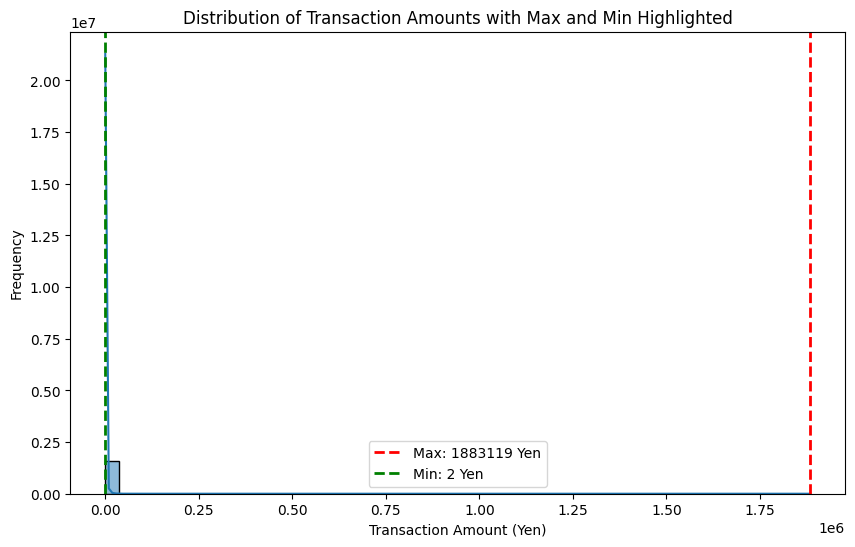

In [8]:
# Plot the histogram of transaction amounts
plt.figure(figsize=(10, 6))
sns.histplot(transactions['amount'], bins=50, kde=True)

# Highlight the max and min values
plt.axvline(max_amount, color='r', linestyle='--', linewidth=2, label=f'Max: {max_amount} Yen')
plt.axvline(min_amount, color='g', linestyle='--', linewidth=2, label=f'Min: {min_amount} Yen')

# Add labels and title
plt.title('Distribution of Transaction Amounts with Max and Min Highlighted')
plt.xlabel('Transaction Amount (Yen)')
plt.ylabel('Frequency')
plt.legend()

# Show the plot
plt.show()

### Defining Bins for Transaction Amounts-   bin edges and labels

In [74]:
# Define the bin edges and labels
bins = [0, 1e3, 1e4, 1e5, 1e6, transactions['amount'].max()]
labels = ['0-1k', '1k-10k', '10k-100k', '100k-1M', '1M+']

# Create a new column in the DataFrame to assign the bucket
transactions['amount_bucket'] = pd.cut(transactions['amount'], bins=bins, labels=labels, right=False)

# Display the first few rows to see the new column
transactions.head()

,id,user_id,store_id,event_occurrence,amount,amount_bucket
0,a555eb55-1da4-6087-b5ab-06b35b608002,93098549-3ff0-e579-01c3-df9183278f64,a3c7874b-75df-9cf2-62ab-cf58be5d9e0e,2020-01-01 06:40:43.323987,315,0-1k
1,f699b867-e70c-5160-90c8-7dfa32dce0da,35ba9da1-98d0-cbb7-7844-e648601b7208,1d59adf3-94f2-f5f8-46c6-8558c544a3a9,2020-01-01 07:04:25.968615,1646,1k-10k
2,5c3f8abc-f4e6-94fd-7b13-fe0efd4e4591,63cb5ee0-a457-9975-5455-4d76109bc754,c835f09d-ac5b-2005-1959-f452456a746a,2020-01-01 07:06:16.164563,385,0-1k
3,f033da1a-bafb-5faa-67e3-c76b07b04333,786fcb82-40cf-1dc9-b9ba-2541502ca95a,eaf4c05d-13e1-7c8a-9ae0-cf2ec2e3dcd2,2020-01-01 07:07:26.029685,166,0-1k
4,ccc35ffe-ee42-b696-783c-6670bfd800ec,acc814f5-beb6-db35-64f1-52f7c5a8466c,a8301ae2-df3b-ffe4-0279-c74af1dbb847,2020-01-01 07:12:24.448015,656,0-1k


### Number of Products Sold by Price Range

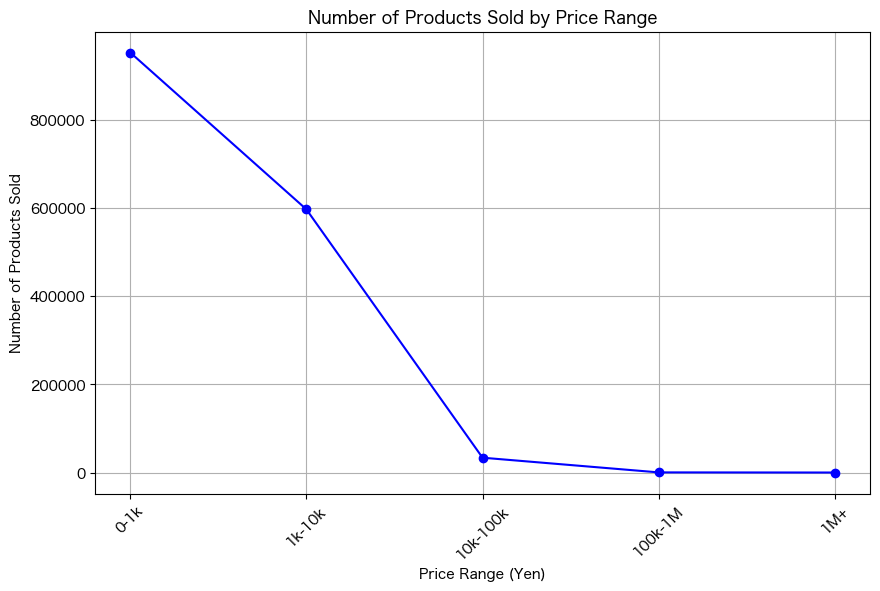

In [76]:
# Count the number of transactions in each bucket
bucket_counts = transactions['amount_bucket'].value_counts().sort_index()

# Convert to DataFrame for plotting
bucket_counts_df = bucket_counts.reset_index()
bucket_counts_df.columns = ['Amount Bucket', 'Number of Products Sold']


# Plot the line graph
plt.figure(figsize=(10, 6))
plt.plot(bucket_counts_df['Amount Bucket'], bucket_counts_df['Number of Products Sold'], marker='o', linestyle='-', color='b')

# Add labels and title
plt.title('Number of Products Sold by Price Range')
plt.xlabel('Price Range (Yen)')
plt.ylabel('Number of Products Sold')
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability

# Show the plot
plt.grid(True)
plt.show()

### Distribution of Transactions by Amount Bucket

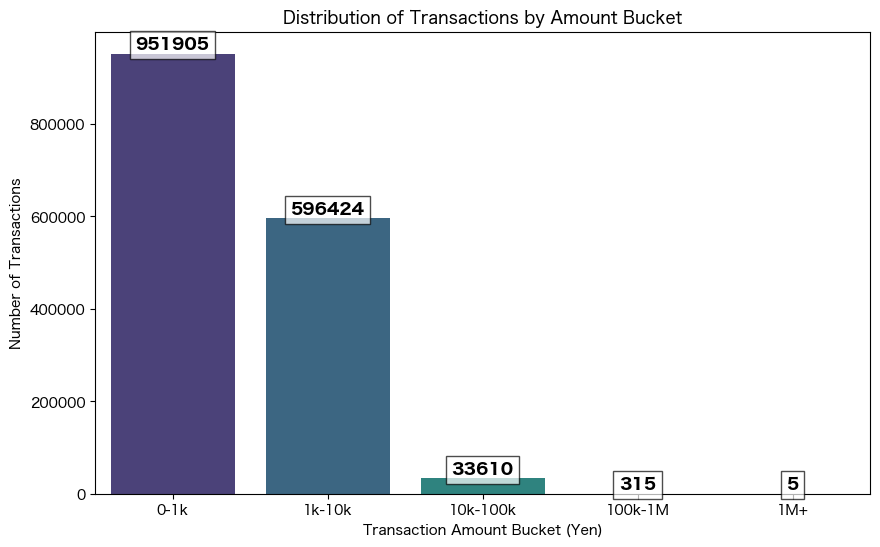

In [77]:
# Count the number of transactions in each bucket
bucket_counts = transactions['amount_bucket'].value_counts().sort_index()

# Convert to DataFrame for plotting
bucket_counts_df = bucket_counts.reset_index()
bucket_counts_df.columns = ['Amount Bucket', 'Number of Transactions']


# Plot the distribution of buckets
plt.figure(figsize=(10, 6))
# bar_plot = sns.barplot(x=bucket_counts.index, y=bucket_counts.values, palette="viridis", dodge=False, legend=False)
bar_plot = sns.barplot(x='Amount Bucket', y='Number of Transactions', data=bucket_counts_df, palette="viridis", hue='Amount Bucket', dodge=False)

# Add labels and title
plt.title('Distribution of Transactions by Amount Bucket')
plt.xlabel('Transaction Amount Bucket (Yen)')
plt.ylabel('Number of Transactions')

# Add data labels with improved visibility
for p in bar_plot.patches:
    # Get the height of the bar
    height = p.get_height()
    # Add text annotation above the bar
    plt.text(p.get_x() + p.get_width() / 2., height, f'{int(height)}', 
             ha='center',                     # Center horizontally
             va='bottom',                     # Place text slightly above the bar
             fontsize=12,                     # Font size for better readability
             color='black',                   # Text color
             weight='bold',                   # Font weight for emphasis
             bbox=dict(facecolor='white', alpha=0.7, edgecolor='black')) # Background box

# Show the plot
plt.grid(False)
plt.show()

## Transactions Over Time

Let’s see how transactions are distributed over time. We can group by the date part of event_occurrence to see daily, monthly, or yearly trends.

### Plot for Daily GMV Over Time

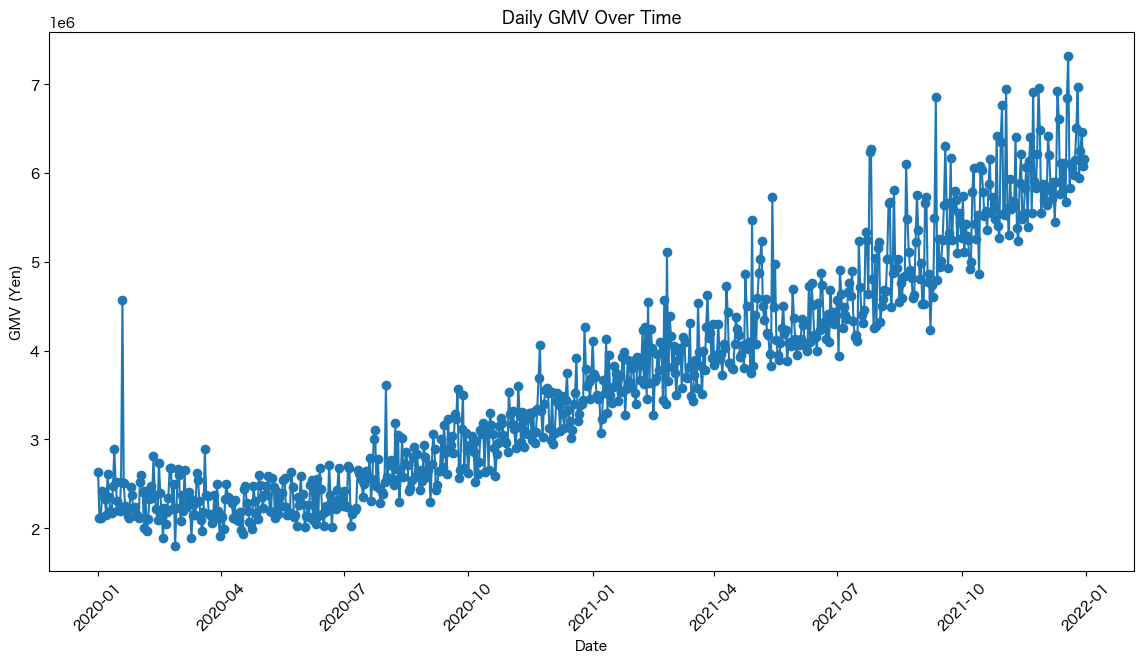

In [81]:
# Aggregate transactions per day
daily_transactions = transactions.groupby(transactions['event_occurrence'].dt.date).agg({'amount': 'sum'}).reset_index()

# Plot the daily GMV over time
plt.figure(figsize=(14, 7))
plt.plot(daily_transactions['event_occurrence'], daily_transactions['amount'], marker='o')
plt.title('Daily GMV Over Time')
plt.xlabel('Date')
plt.ylabel('GMV (Yen)')
plt.xticks(rotation=45)
plt.show()

### Monthly GMV Over Time

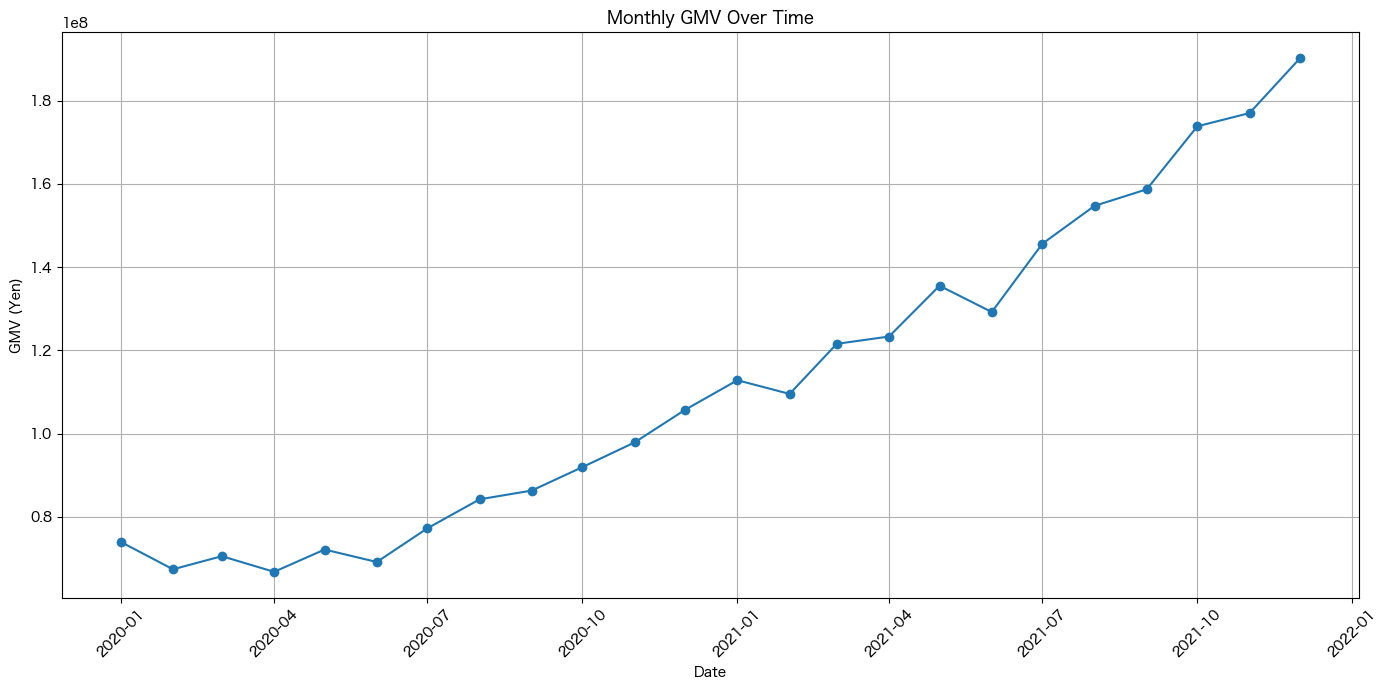

In [79]:
# monthly trends 
# Aggregate transactions per month
monthly_transactions = transactions.groupby(transactions['event_occurrence'].dt.to_period('M')).agg({'amount': 'sum'}).reset_index()

# Convert Period to datetime
monthly_transactions['event_occurrence'] = monthly_transactions['event_occurrence'].dt.to_timestamp()

# Plot the monthly GMV over time
plt.figure(figsize=(14, 7))
plt.plot(monthly_transactions['event_occurrence'], monthly_transactions['amount'], marker='o')
plt.title('Monthly GMV Over Time')
plt.xlabel('Date')
plt.ylabel('GMV (Yen)')
plt.xticks(rotation=45)
plt.grid(True)
plt.tight_layout()
plt.show()

### Quarterly GMV Over Time

<Figure size 1400x700 with 0 Axes>

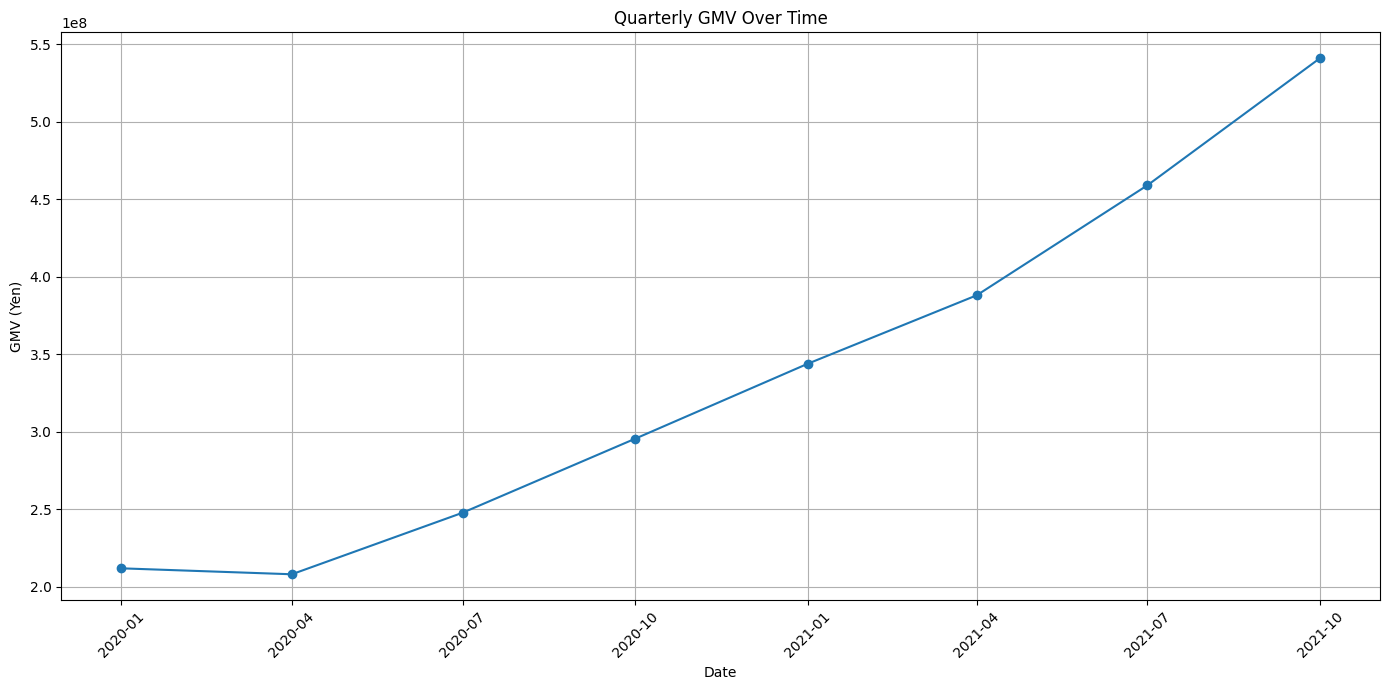

<Figure size 1400x700 with 0 Axes>

In [17]:
# quarterly trends 
# Aggregate transactions per quarter
quarterly_transactions = transactions.groupby(transactions['event_occurrence'].dt.to_period('Q')).agg({'amount': 'sum'}).reset_index()

# Convert Period to datetime
quarterly_transactions['event_occurrence'] = quarterly_transactions['event_occurrence'].dt.to_timestamp()

# Plot the quarterly GMV over time
plt.figure(figsize=(14, 7))
plt.plot(quarterly_transactions['event_occurrence'], quarterly_transactions['amount'], marker='o')
plt.title('Quarterly GMV Over Time')
plt.xlabel('Date')
plt.ylabel('GMV (Yen)')
plt.xticks(rotation=45)
plt.grid(True)
plt.tight_layout()
plt.figure(figsize=(14, 7))


## Transactions Per User and Per Store

We should explore how transactions are distributed across different users and stores.

### Distribution of GMV per User

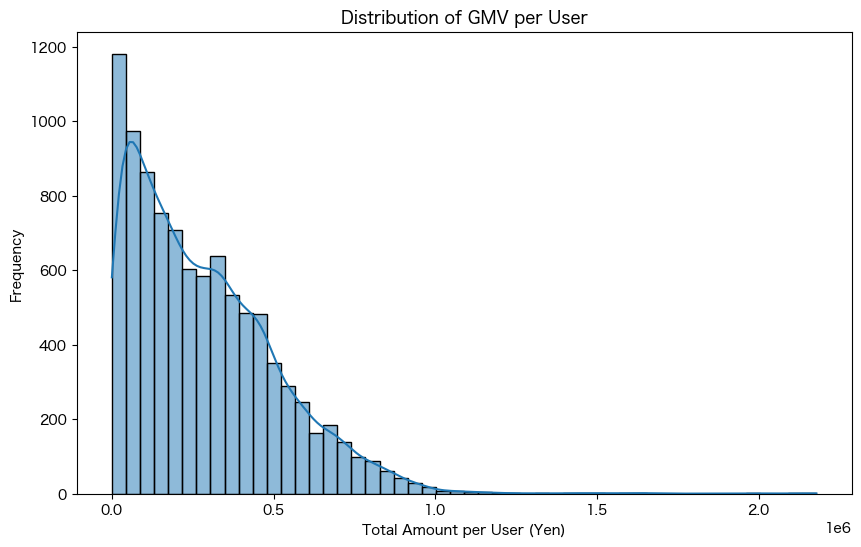

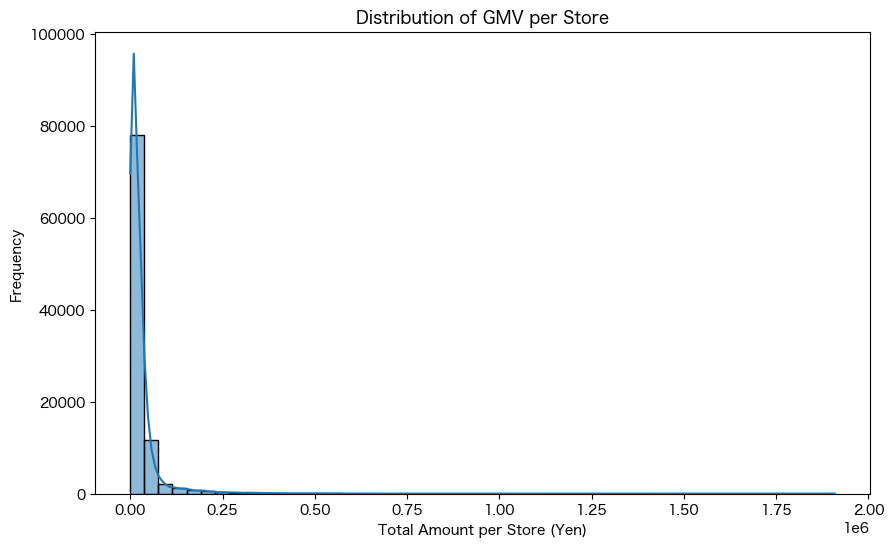

In [80]:
# Transactions per user
user_transactions = transactions.groupby('user_id').agg({'amount': 'sum'}).reset_index()

# Transactions per store
store_transactions = transactions.groupby('store_id').agg({'amount': 'sum'}).reset_index()

# Plot transactions per user
plt.figure(figsize=(10, 6))
sns.histplot(user_transactions['amount'], bins=50, kde=True)
plt.title('Distribution of GMV per User')
plt.xlabel('Total Amount per User (Yen)')
plt.ylabel('Frequency')
plt.show()

# Plot transactions per store
plt.figure(figsize=(10, 6))
sns.histplot(store_transactions['amount'], bins=50, kde=True)
plt.title('Distribution of GMV per Store')
plt.xlabel('Total Amount per Store (Yen)')
plt.ylabel('Frequency')
plt.show()

### Create buckets for user and store transactions

#### - Distribution of User Transactions by Amount Bucket

/var/folders/lf/61ckn_jj7ms6gzszf65hx3y80000gn/T/ipykernel_34577/3738016007.py:37: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(x=user_bucket_counts.index, y=user_bucket_counts.values, palette='viridis')


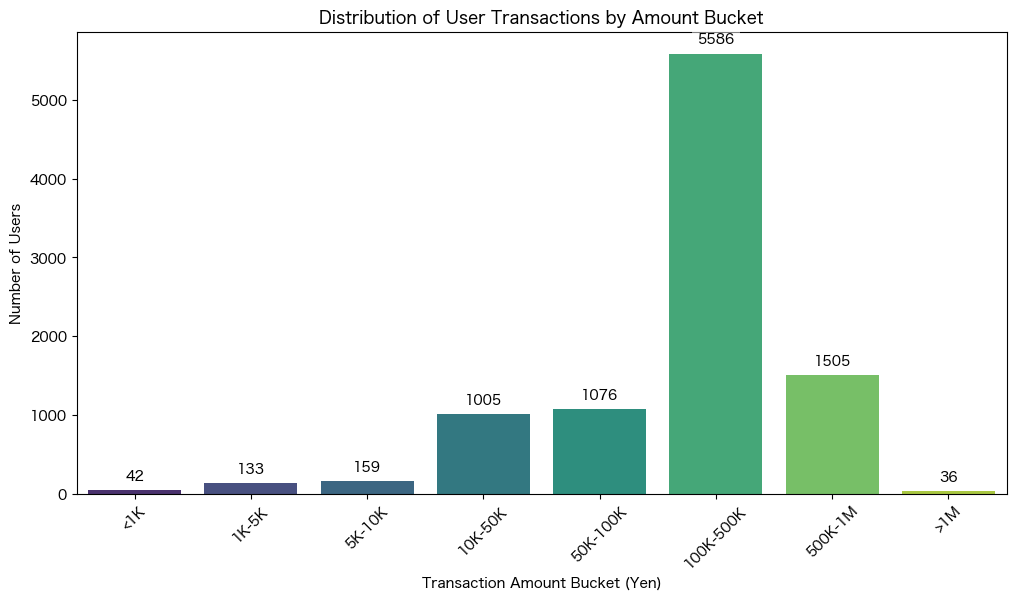

In [84]:
# Aggregate transactions per user
user_transactions = transactions.groupby('user_id').agg({'amount': 'sum'}).reset_index()
user_transactions.columns = ['User ID', 'Total Amount']

# Aggregate transactions per store
store_transactions = transactions.groupby('store_id').agg({'amount': 'sum'}).reset_index()
store_transactions.columns = ['Store ID', 'Total Amount']

# Create buckets for user and store transactions
bins = [0, 1000, 5000, 10000, 50000, 100000, 500000, 1000000, float('inf')]
labels = ['<1K', '1K-5K', '5K-10K', '10K-50K', '50K-100K', '100K-500K', '500K-1M', '>1M']

# Bucket transactions per user
user_transactions['Amount Bucket'] = pd.cut(user_transactions['Total Amount'], bins=bins, labels=labels, right=False)
user_bucket_counts = user_transactions['Amount Bucket'].value_counts().sort_index()

# Bucket transactions per store
store_transactions['Amount Bucket'] = pd.cut(store_transactions['Total Amount'], bins=bins, labels=labels, right=False)
store_bucket_counts = store_transactions['Amount Bucket'].value_counts().sort_index()

# Helper function to add value labels on top of bars
def add_value_labels(ax, data):
    for p in ax.patches:
        height = p.get_height()
        ax.annotate(f'{int(height)}', 
                    (p.get_x() + p.get_width() / 2., height), 
                    ha='center', 
                    va='bottom', 
                    fontsize=10, 
                    color='black', 
                    xytext=(0, 5),  # 5 points vertical offset
                    textcoords='offset points', 
                    bbox=dict(facecolor='white', alpha=0.5, edgecolor='none'))

# Plot Buckets for User Transactions
plt.figure(figsize=(12, 6))
ax = sns.barplot(x=user_bucket_counts.index, y=user_bucket_counts.values, palette='viridis')
plt.title('Distribution of User Transactions by Amount Bucket')
plt.xlabel('Transaction Amount Bucket (Yen)')
plt.ylabel('Number of Users')
plt.xticks(rotation=45)
plt.grid(False)
add_value_labels(ax, user_bucket_counts.values)
plt.show()


#### - Distribution of Store Transactions by Amount Bucket

/var/folders/lf/61ckn_jj7ms6gzszf65hx3y80000gn/T/ipykernel_34577/4087574676.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(x=store_bucket_counts.index, y=store_bucket_counts.values, palette='viridis')


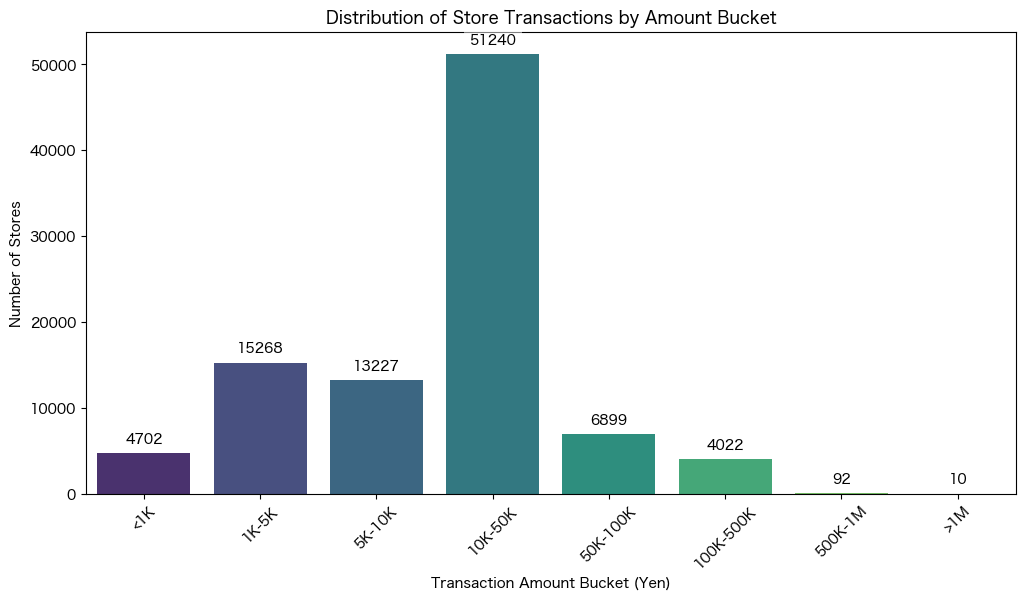

In [85]:

# Plot Buckets for Store Transactions
plt.figure(figsize=(12, 6))
ax = sns.barplot(x=store_bucket_counts.index, y=store_bucket_counts.values, palette='viridis')
plt.title('Distribution of Store Transactions by Amount Bucket')
plt.xlabel('Transaction Amount Bucket (Yen)')
plt.ylabel('Number of Stores')
plt.xticks(rotation=45)
plt.grid(False)
add_value_labels(ax, store_bucket_counts.values)
plt.show()

## EDA on Users Data

- Basic Statistics and Data Overview

- Let’s explore the users dataset:

In [86]:
# Check the first few rows of the users data
users.head()

,id,gender,age
0,3cf2d95c-851a-3e66-bd62-36050c1aa8dd,M,30.0
1,a85536f3-1bf8-fbeb-d06e-62e6dc5a2a83,M,55.0
2,355a293c-2c15-d6bd-45ce-cd3c275ee5a9,M,40.0
3,61fb5b45-9bf8-1659-7a0c-b6f85a0f870b,NaN,NaN
4,ff9e16ef-3a0b-9373-567f-fb07cbc96874,M,90.0


In [87]:
# Get basic statistics of the users data
users.describe()


,age
count,9463.000000
mean,52.730318
std,21.441445
min,15.000000
25%,34.000000
50%,52.000000
75%,71.000000
max,90.000000


In [88]:
# Check for missing values
users.isnull().sum()

id          0
gender    996
age       498
dtype: int64

In [91]:
### identify missing values

In [92]:
# Identify IDs with missing gender
missing_gender_ids = users[users['gender'].isnull()]['id'].unique()

# Identify IDs with missing age
missing_age_ids = users[users['age'].isnull()]['id'].unique()

# Identify IDs with both missing gender and age
missing_both_ids = users[users['gender'].isnull() & users['age'].isnull()]['id'].unique()

# Number of unique IDs with missing gender
num_missing_gender = len(missing_gender_ids)

# Number of unique IDs with missing age
num_missing_age = len(missing_age_ids)

# Number of unique IDs with both missing gender and age
num_missing_both = len(missing_both_ids)

# Display the results
print(f"Number of unique IDs with missing gender: {num_missing_gender}")
print(f"Number of unique IDs with missing age: {num_missing_age}")
print(f"Number of unique IDs with both missing gender and age: {num_missing_both}")

Number of unique IDs with missing gender: 996
Number of unique IDs with missing age: 498
Number of unique IDs with both missing gender and age: 498


In [93]:
users.count()

id        9961
gender    8965
age       9463
dtype: int64

In [100]:
# Find distinct values in the 'gender' column
distinct_genders = users['gender'].unique()

# Display the distinct values
distinct_genders

array(['M', nan, 'F', 'OTHER'], dtype=object)

### Create clean users data


In [95]:
# Identify IDs with both missing gender and age
missing_both_ids = users[users['gender'].isnull() & users['age'].isnull()]['id']

# Remove records where both gender and age are missing
cleaned_users = users[~users['id'].isin(missing_both_ids)]

# Display the cleaned DataFrame
cleaned_users.count()

# Assign a static value 'Unknown' to missing gender
cleaned_users['gender'] = cleaned_users['gender'].fillna('Unknown')
# Display the cleaned DataFrame
cleaned_users.count()

/var/folders/lf/61ckn_jj7ms6gzszf65hx3y80000gn/T/ipykernel_34577/4136272387.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cleaned_users['gender'] = cleaned_users['gender'].fillna('Unknown')


id        9463
gender    9463
age       9463
dtype: int64

### Age Distribution of Users

#### Visualize the age distribution of users:

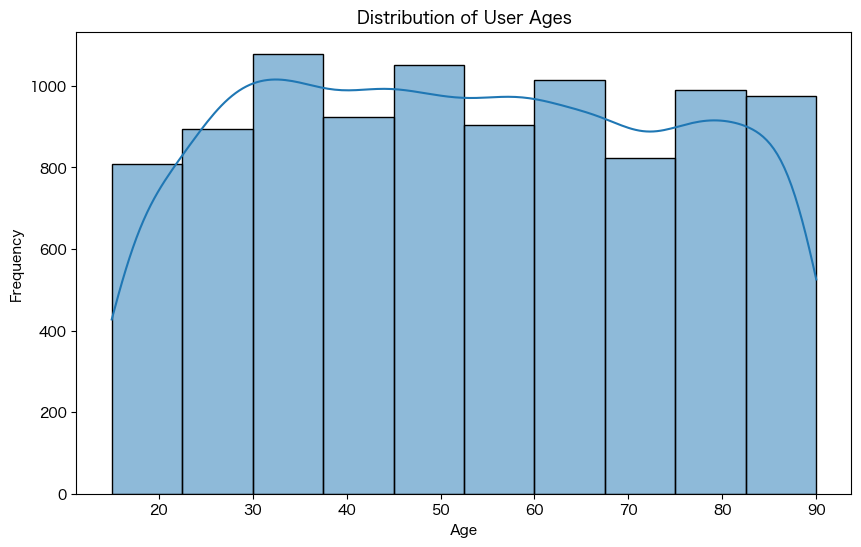

In [98]:
# Plot distribution of user ages
plt.figure(figsize=(10, 6))
sns.histplot(cleaned_users['age'], bins=10, kde=True)
plt.title('Distribution of User Ages')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.show()

### Gender Distribution

#### Visualize the gender distribution of users:

/var/folders/lf/61ckn_jj7ms6gzszf65hx3y80000gn/T/ipykernel_34577/3086704576.py:21: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(x=gender_distribution.index, y=gender_distribution.values, palette='viridis')


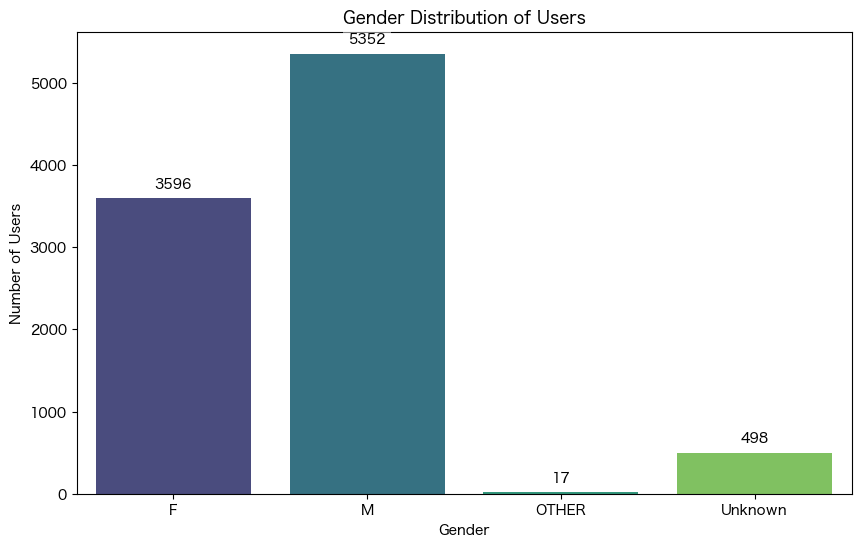

In [99]:

# Assuming users DataFrame is already defined
# Calculate the gender distribution
gender_distribution = cleaned_users['gender'].value_counts().sort_index()

# Helper function to add value labels on top of bars
def add_value_labels(ax):
    for p in ax.patches:
        height = p.get_height()
        ax.annotate(f'{int(height)}', 
                    (p.get_x() + p.get_width() / 2., height), 
                    ha='center', 
                    va='bottom', 
                    fontsize=10, 
                    color='black', 
                    xytext=(0, 5),  # 5 points vertical offset
                    textcoords='offset points', 
                    bbox=dict(facecolor='white', alpha=0.5, edgecolor='none'))

# Plot the gender distribution
plt.figure(figsize=(10, 6))
ax = sns.barplot(x=gender_distribution.index, y=gender_distribution.values, palette='viridis')
plt.title('Gender Distribution of Users')
plt.xlabel('Gender')
plt.ylabel('Number of Users')
# plt.grid(True)
add_value_labels(ax)
plt.show()

 
## EDA on Store data

- Basic Statistics and Data Overview

- Let’s explore the Store dataset:

In [60]:
stores.head()

,id,nam,laa,category,lat,lon
0,139a9a4b-1cb4-cb91-f718-d0bdd7db31c9,Aichi Ken,Agui Cho,ショッピング,34.951439,136.935126
1,437e0dae-dbf7-b1a8-4a03-010b9597bbd2,Aichi Ken,Agui Cho,マッサージ,34.947078,136.884972
2,2deb0ff0-5909-c169-4a23-4ed3979467fc,Aichi Ken,Agui Cho,その他,34.926083,136.928418
3,093585a3-96ce-7513-4d60-1dd36c4b30d2,Aichi Ken,Agui Cho,カフェ,34.952815,136.889037
4,d0637fde-e4c8-4c60-5817-a3494a623a6f,Aichi Ken,Agui Cho,グルメ,34.922963,136.892997


### Category Distribution of Stores

- Visualize the distribution of store categories:

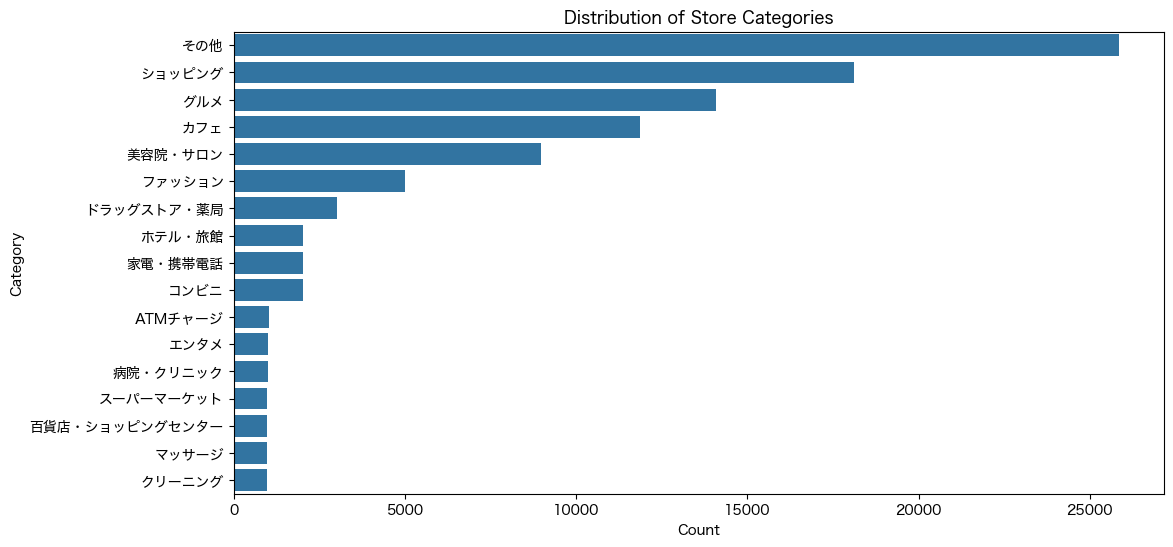

In [102]:
# Plot category distribution
# Override the font-family which supports CJK characters
matplotlib.rcParams['font.family'] = 'Hiragino sans'
plt.figure(figsize=(12, 6))
sns.countplot(y='category', data=stores, order=stores['category'].value_counts().index)
plt.title('Distribution of Store Categories')
plt.xlabel('Count')
plt.ylabel('Category')
plt.show()

3. Geographic Distribution of Stores

Let’s see how the stores are distributed geographically.

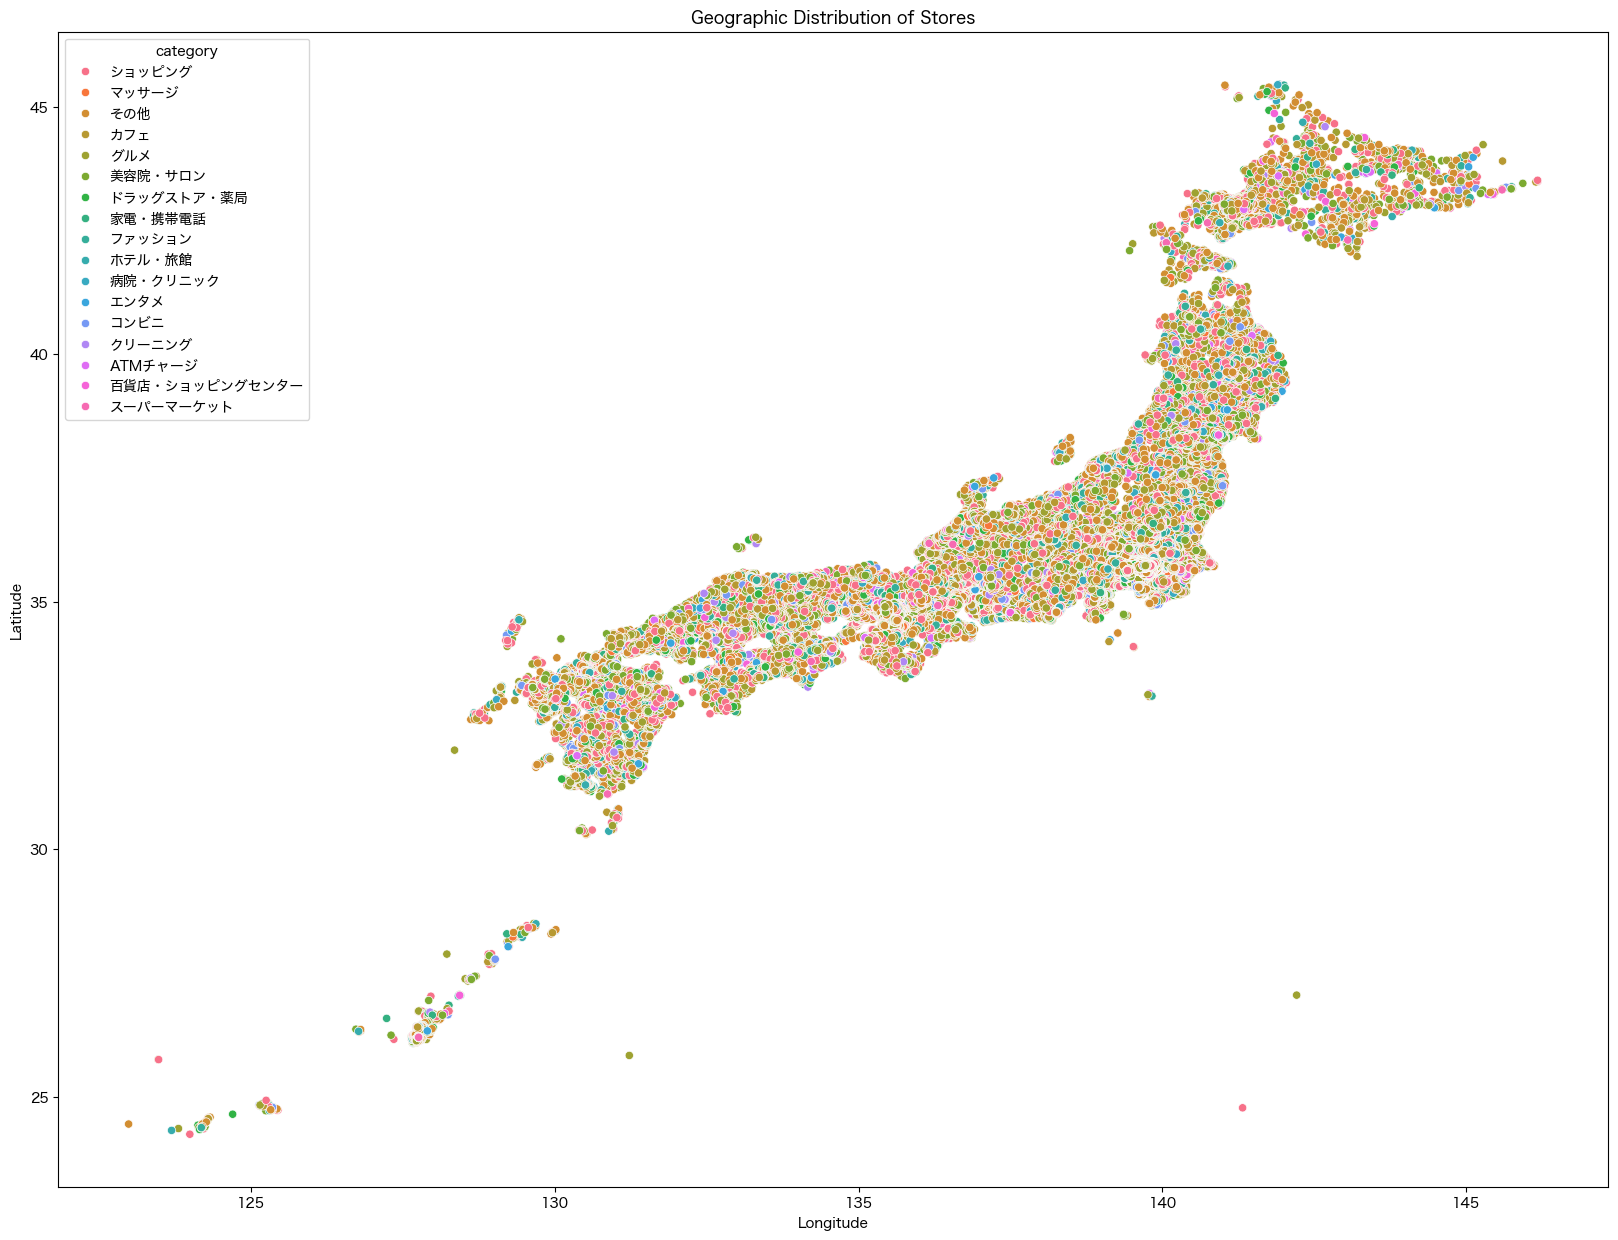

In [103]:
# Scatter plot of store locations
plt.figure(figsize=(20, 15))
sns.scatterplot(x='lon', y='lat', hue='category', data=stores)
plt.title('Geographic Distribution of Stores')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.show()

### Number of Stores by Prefecture

Distribution of Stores by Prefecture:


/var/folders/lf/61ckn_jj7ms6gzszf65hx3y80000gn/T/ipykernel_34577/4162263861.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=prefecture_distribution.index, y=prefecture_distribution.values, palette="viridis")


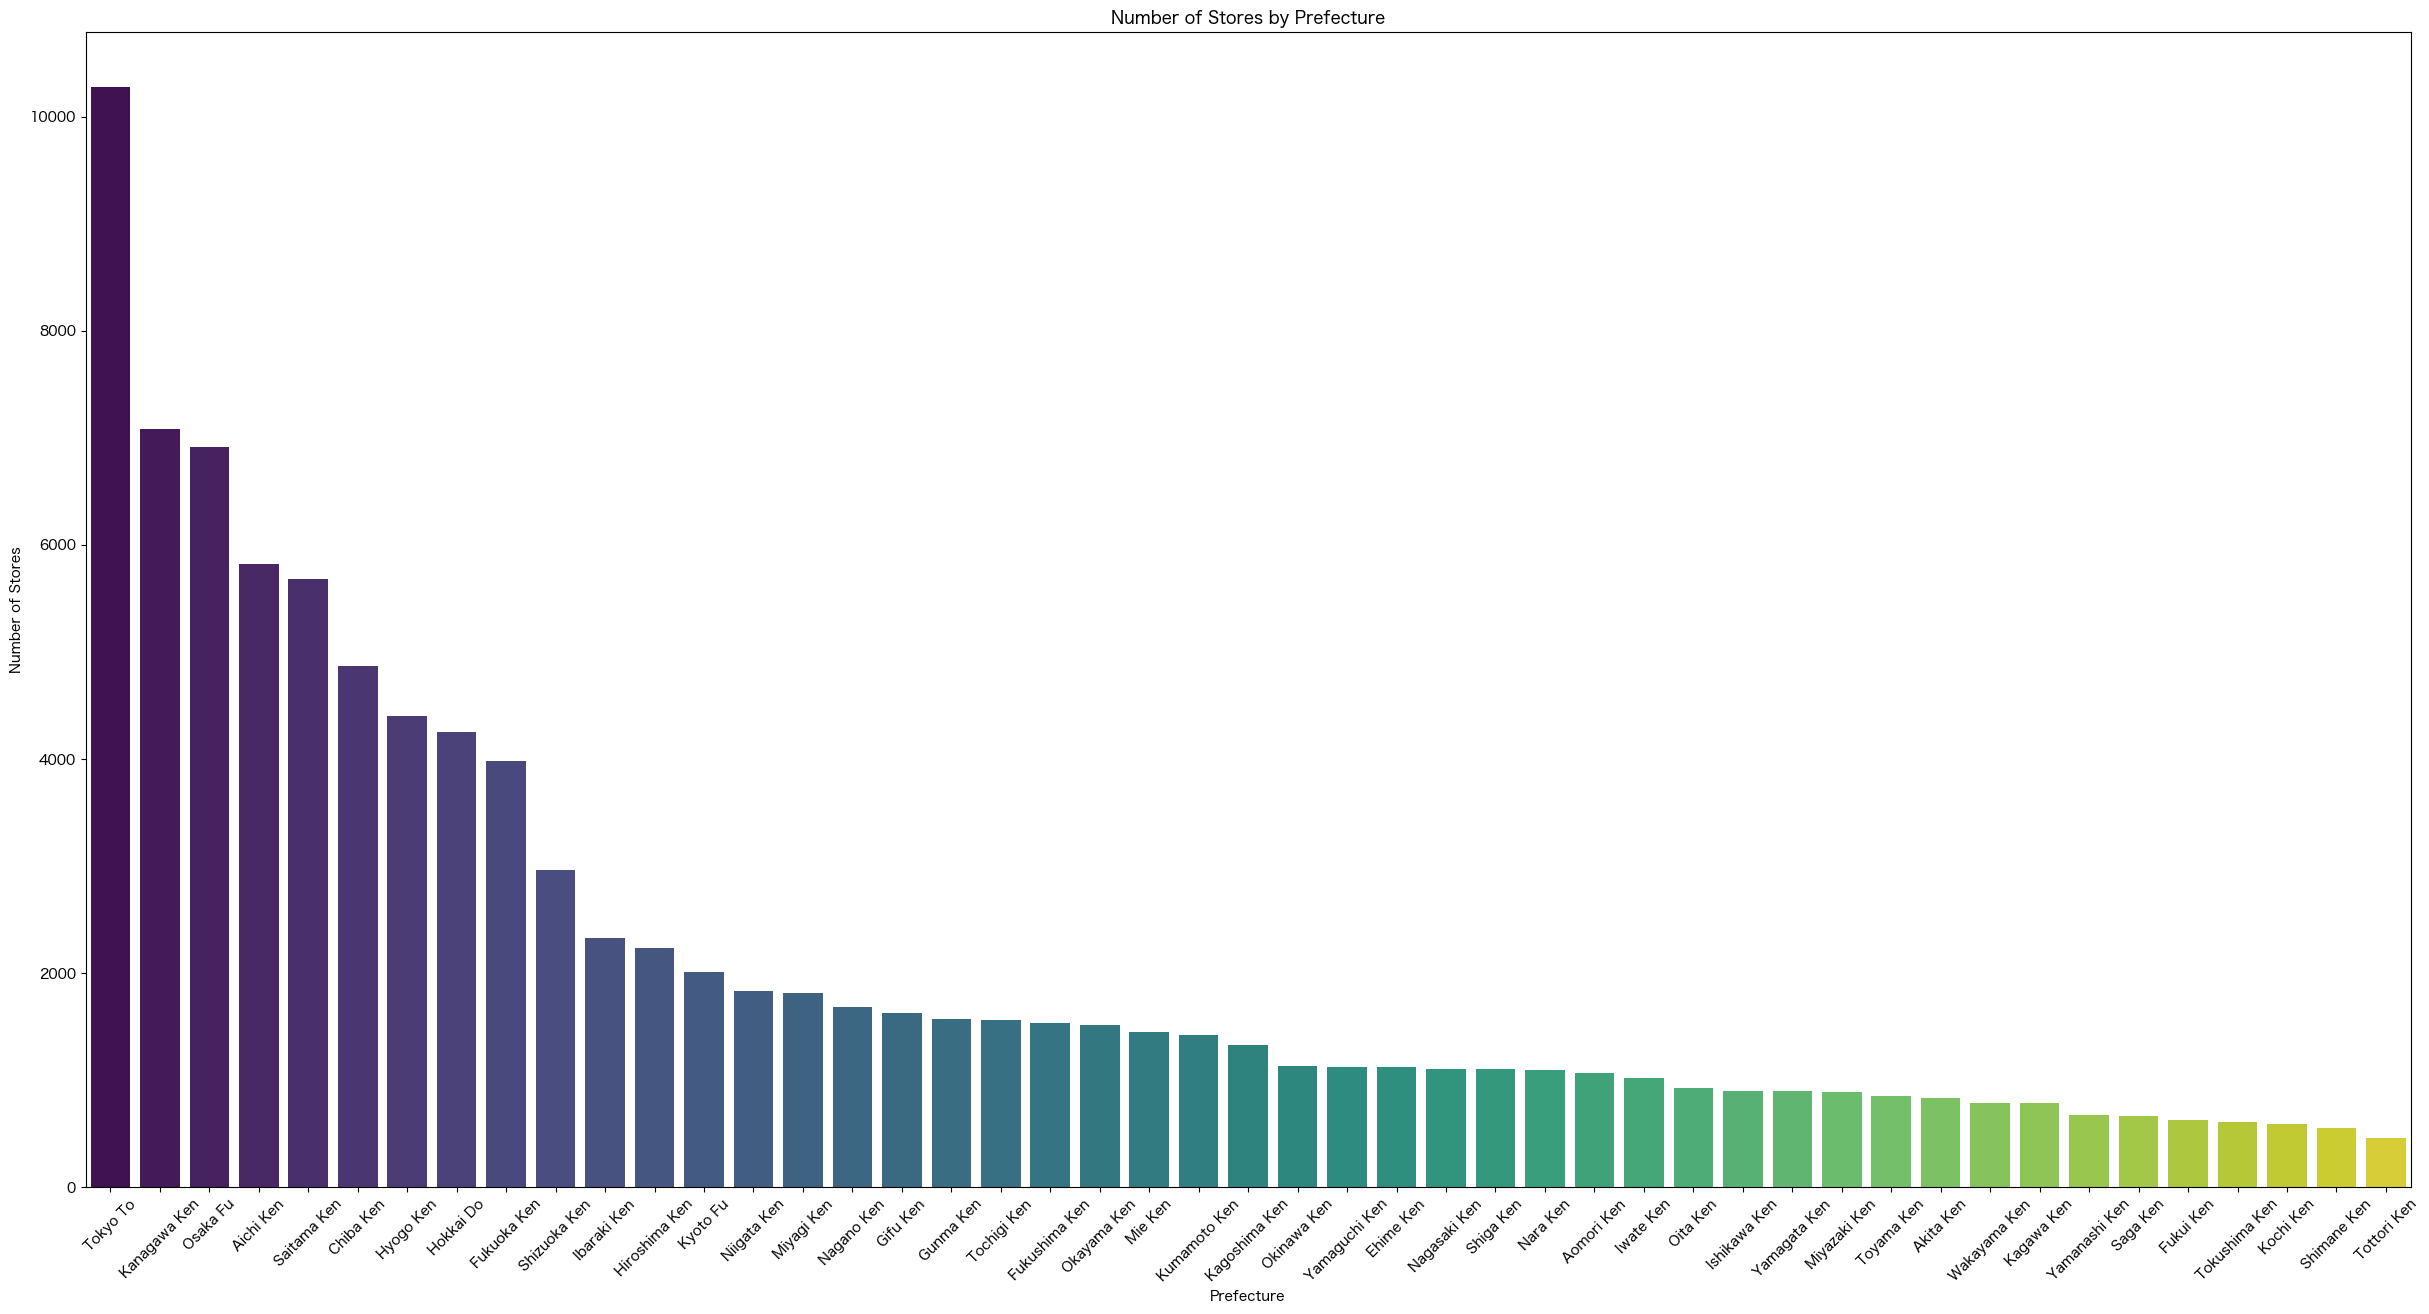

In [108]:

# General Distribution by Prefecture (nam)
prefecture_distribution = stores['nam'].value_counts()
print("Distribution of Stores by Prefecture:")
# print(prefecture_distribution)

# Plot distribution by Prefecture
plt.figure(figsize=(30, 15))
sns.barplot(x=prefecture_distribution.index, y=prefecture_distribution.values, palette="viridis")
plt.title('Number of Stores by Prefecture')
plt.xlabel('Prefecture')
plt.ylabel('Number of Stores')
plt.xticks(rotation=45)
plt.show()

### Number of Stores by Local Administrative Area


Distribution of Stores by Local Administrative Area:


/var/folders/lf/61ckn_jj7ms6gzszf65hx3y80000gn/T/ipykernel_34577/422932267.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=laa_distribution.index, y=laa_distribution.values, palette="viridis")


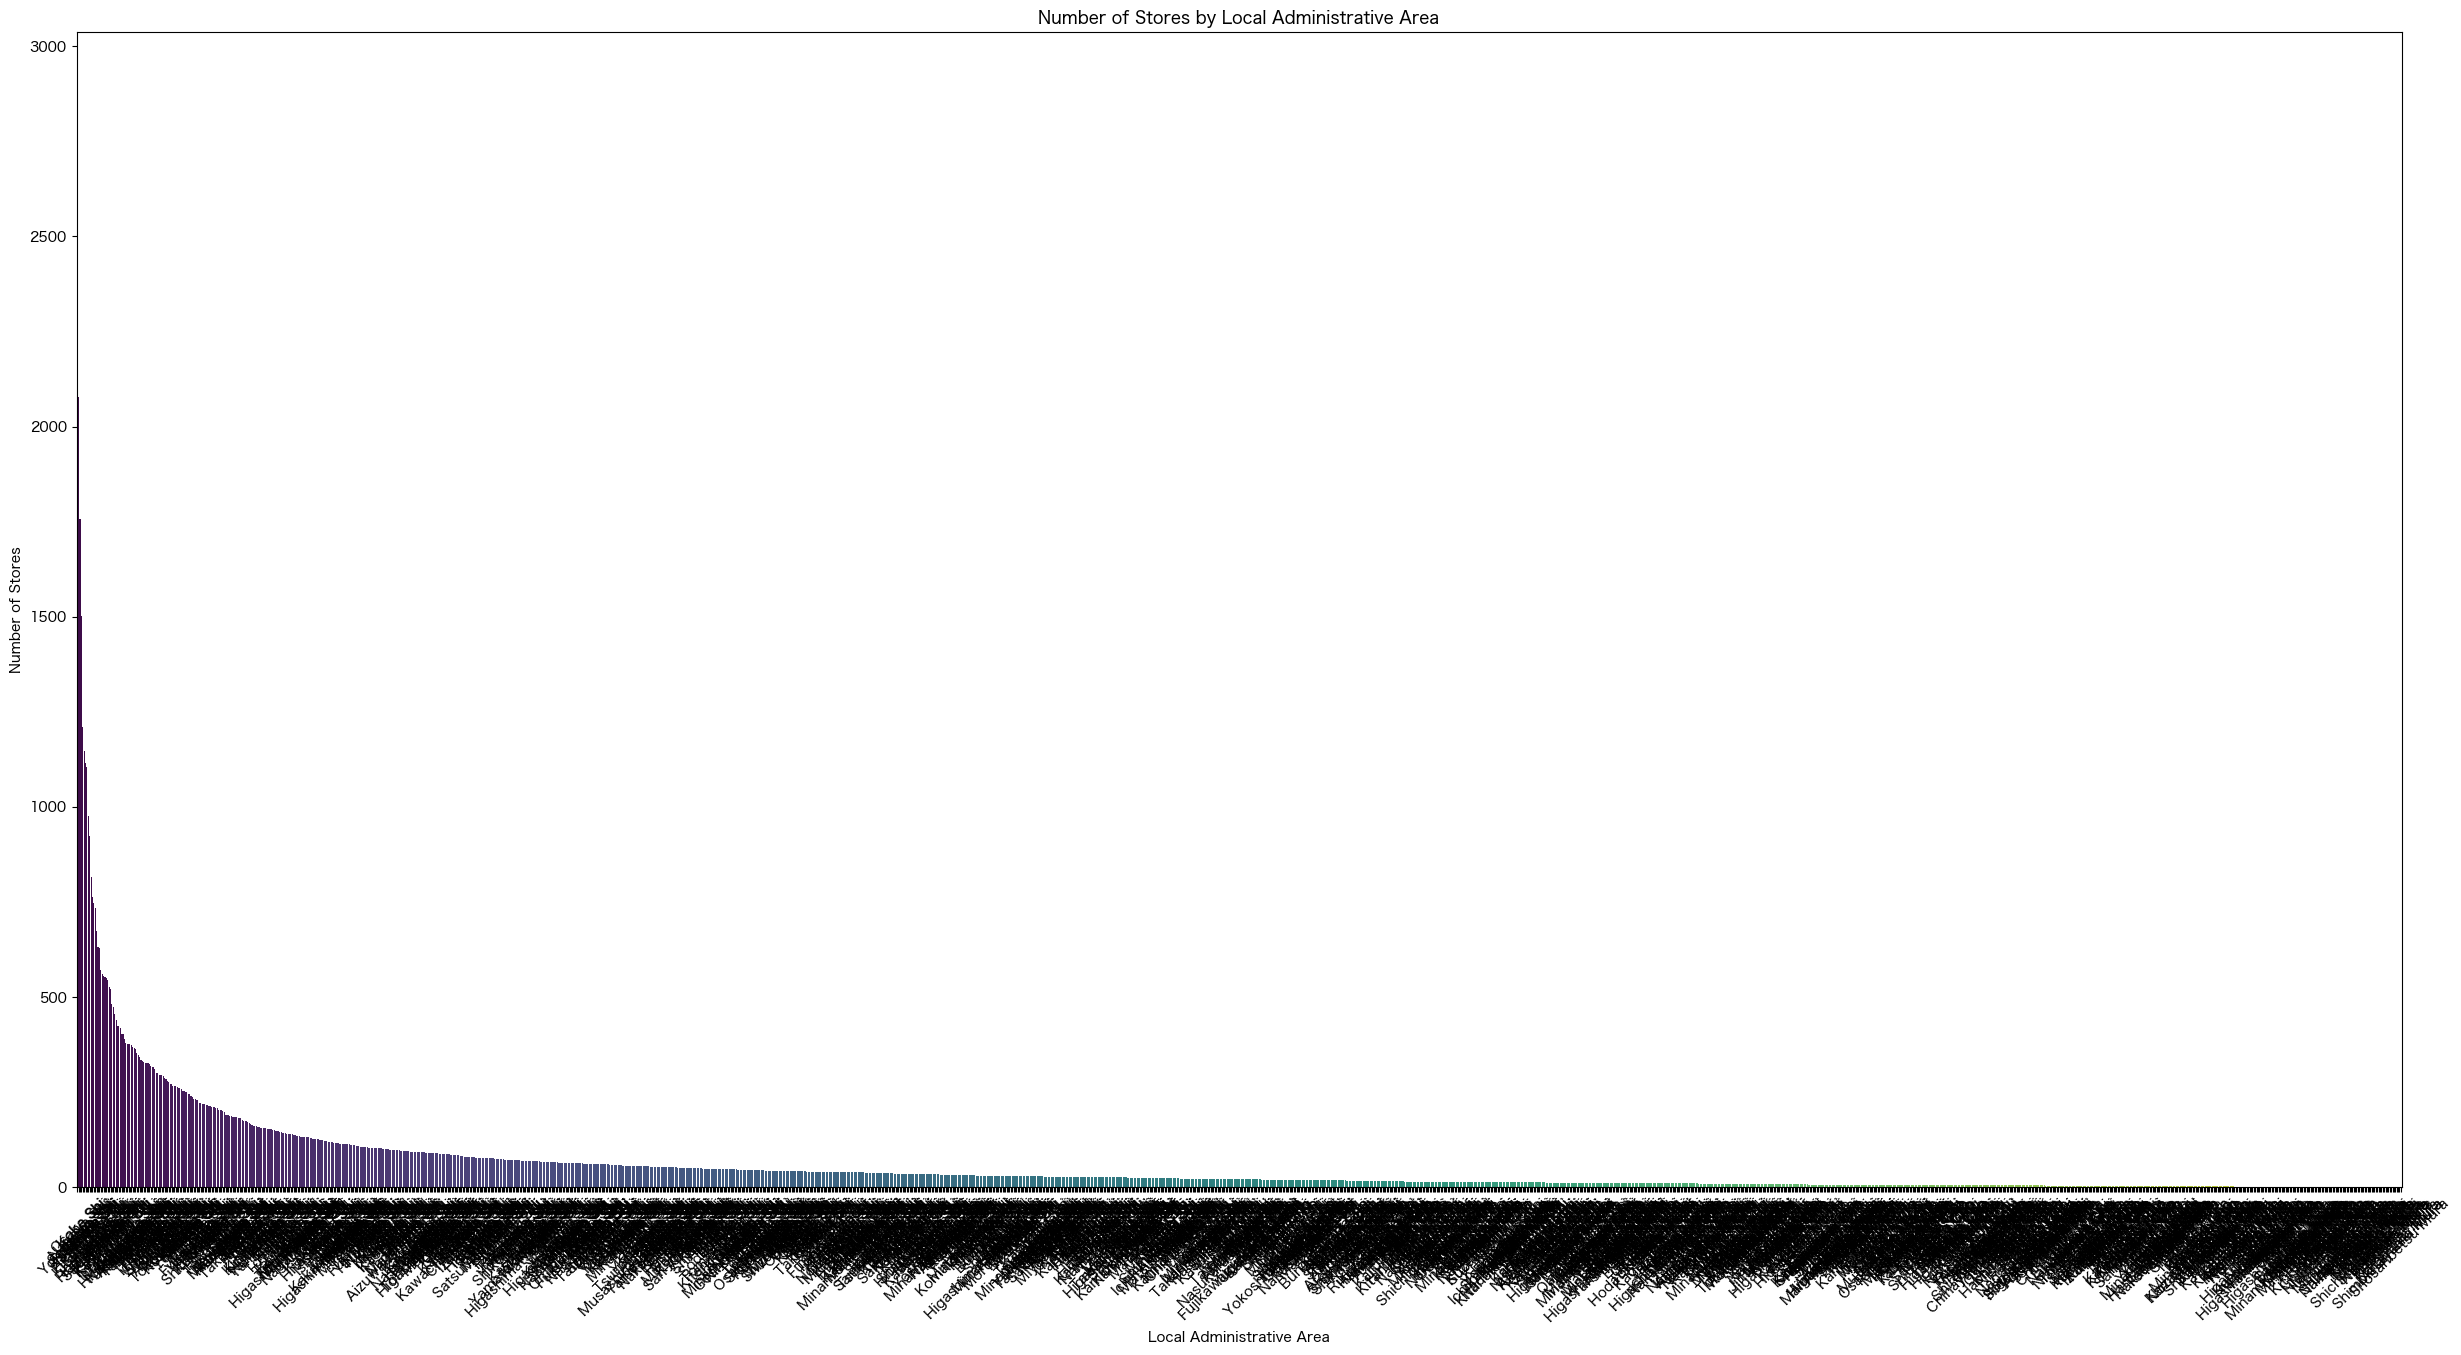

In [109]:
# Plot distribution by Local Administrative Area
# General Distribution by Local Administrative Area (laa)
laa_distribution = stores['laa'].value_counts()
print("\nDistribution of Stores by Local Administrative Area:")
# print(laa_distribution)

plt.figure(figsize=(30, 15))
sns.barplot(x=laa_distribution.index, y=laa_distribution.values, palette="viridis")
plt.title('Number of Stores by Local Administrative Area')
plt.xlabel('Local Administrative Area')
plt.ylabel('Number of Stores')
plt.xticks(rotation=45)
plt.show()

### Top 10 Prefectures by Number of Stores

/var/folders/lf/61ckn_jj7ms6gzszf65hx3y80000gn/T/ipykernel_34577/1103442667.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_prefectures.index, y=top_prefectures.values, palette="viridis")


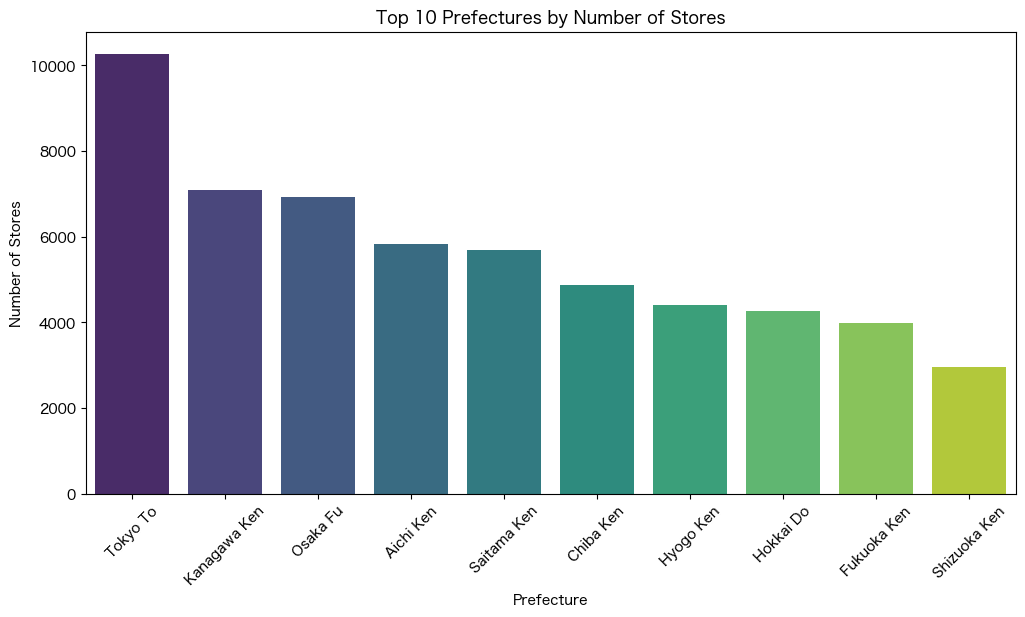

In [110]:

# General Distribution by Prefecture (nam)
prefecture_distribution = stores['nam'].value_counts()
top_n = 10
top_prefectures = prefecture_distribution.head(top_n)

# Plot top N prefectures
plt.figure(figsize=(12, 6))
sns.barplot(x=top_prefectures.index, y=top_prefectures.values, palette="viridis")
plt.title(f'Top {top_n} Prefectures by Number of Stores')
plt.xlabel('Prefecture')
plt.ylabel('Number of Stores')
plt.xticks(rotation=45)
plt.show()


### Top 10 Local Administrative Areas by Number of Stores

/var/folders/lf/61ckn_jj7ms6gzszf65hx3y80000gn/T/ipykernel_34577/899459417.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_laa.index, y=top_laa.values, palette="viridis")


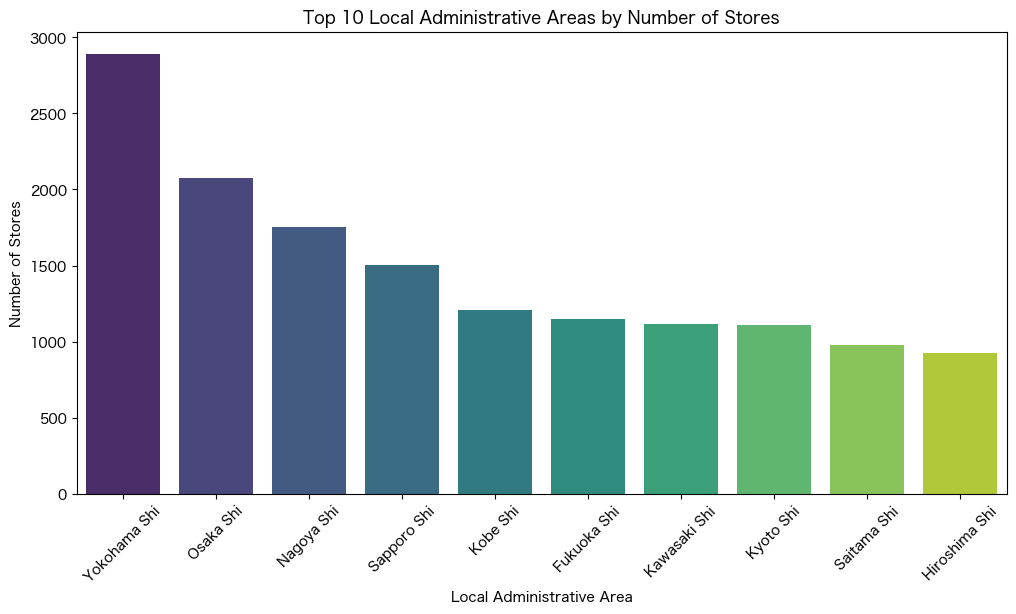

In [111]:
# General Distribution by Local Administrative Area (laa)
laa_distribution = stores['laa'].value_counts()
top_laa = laa_distribution.head(top_n)

# Plot top N local administrative areas
plt.figure(figsize=(12, 6))
sns.barplot(x=top_laa.index, y=top_laa.values, palette="viridis")
plt.title(f'Top {top_n} Local Administrative Areas by Number of Stores')
plt.xlabel('Local Administrative Area')
plt.ylabel('Number of Stores')
plt.xticks(rotation=45)
plt.show()

### Same as above but with  Horizontal Bar Plots

For better readability with long names or many categories.

#### # Horizontal bar plot for prefectures

/var/folders/lf/61ckn_jj7ms6gzszf65hx3y80000gn/T/ipykernel_34577/50086001.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(y=prefecture_distribution.index, x=prefecture_distribution.values, palette="viridis")


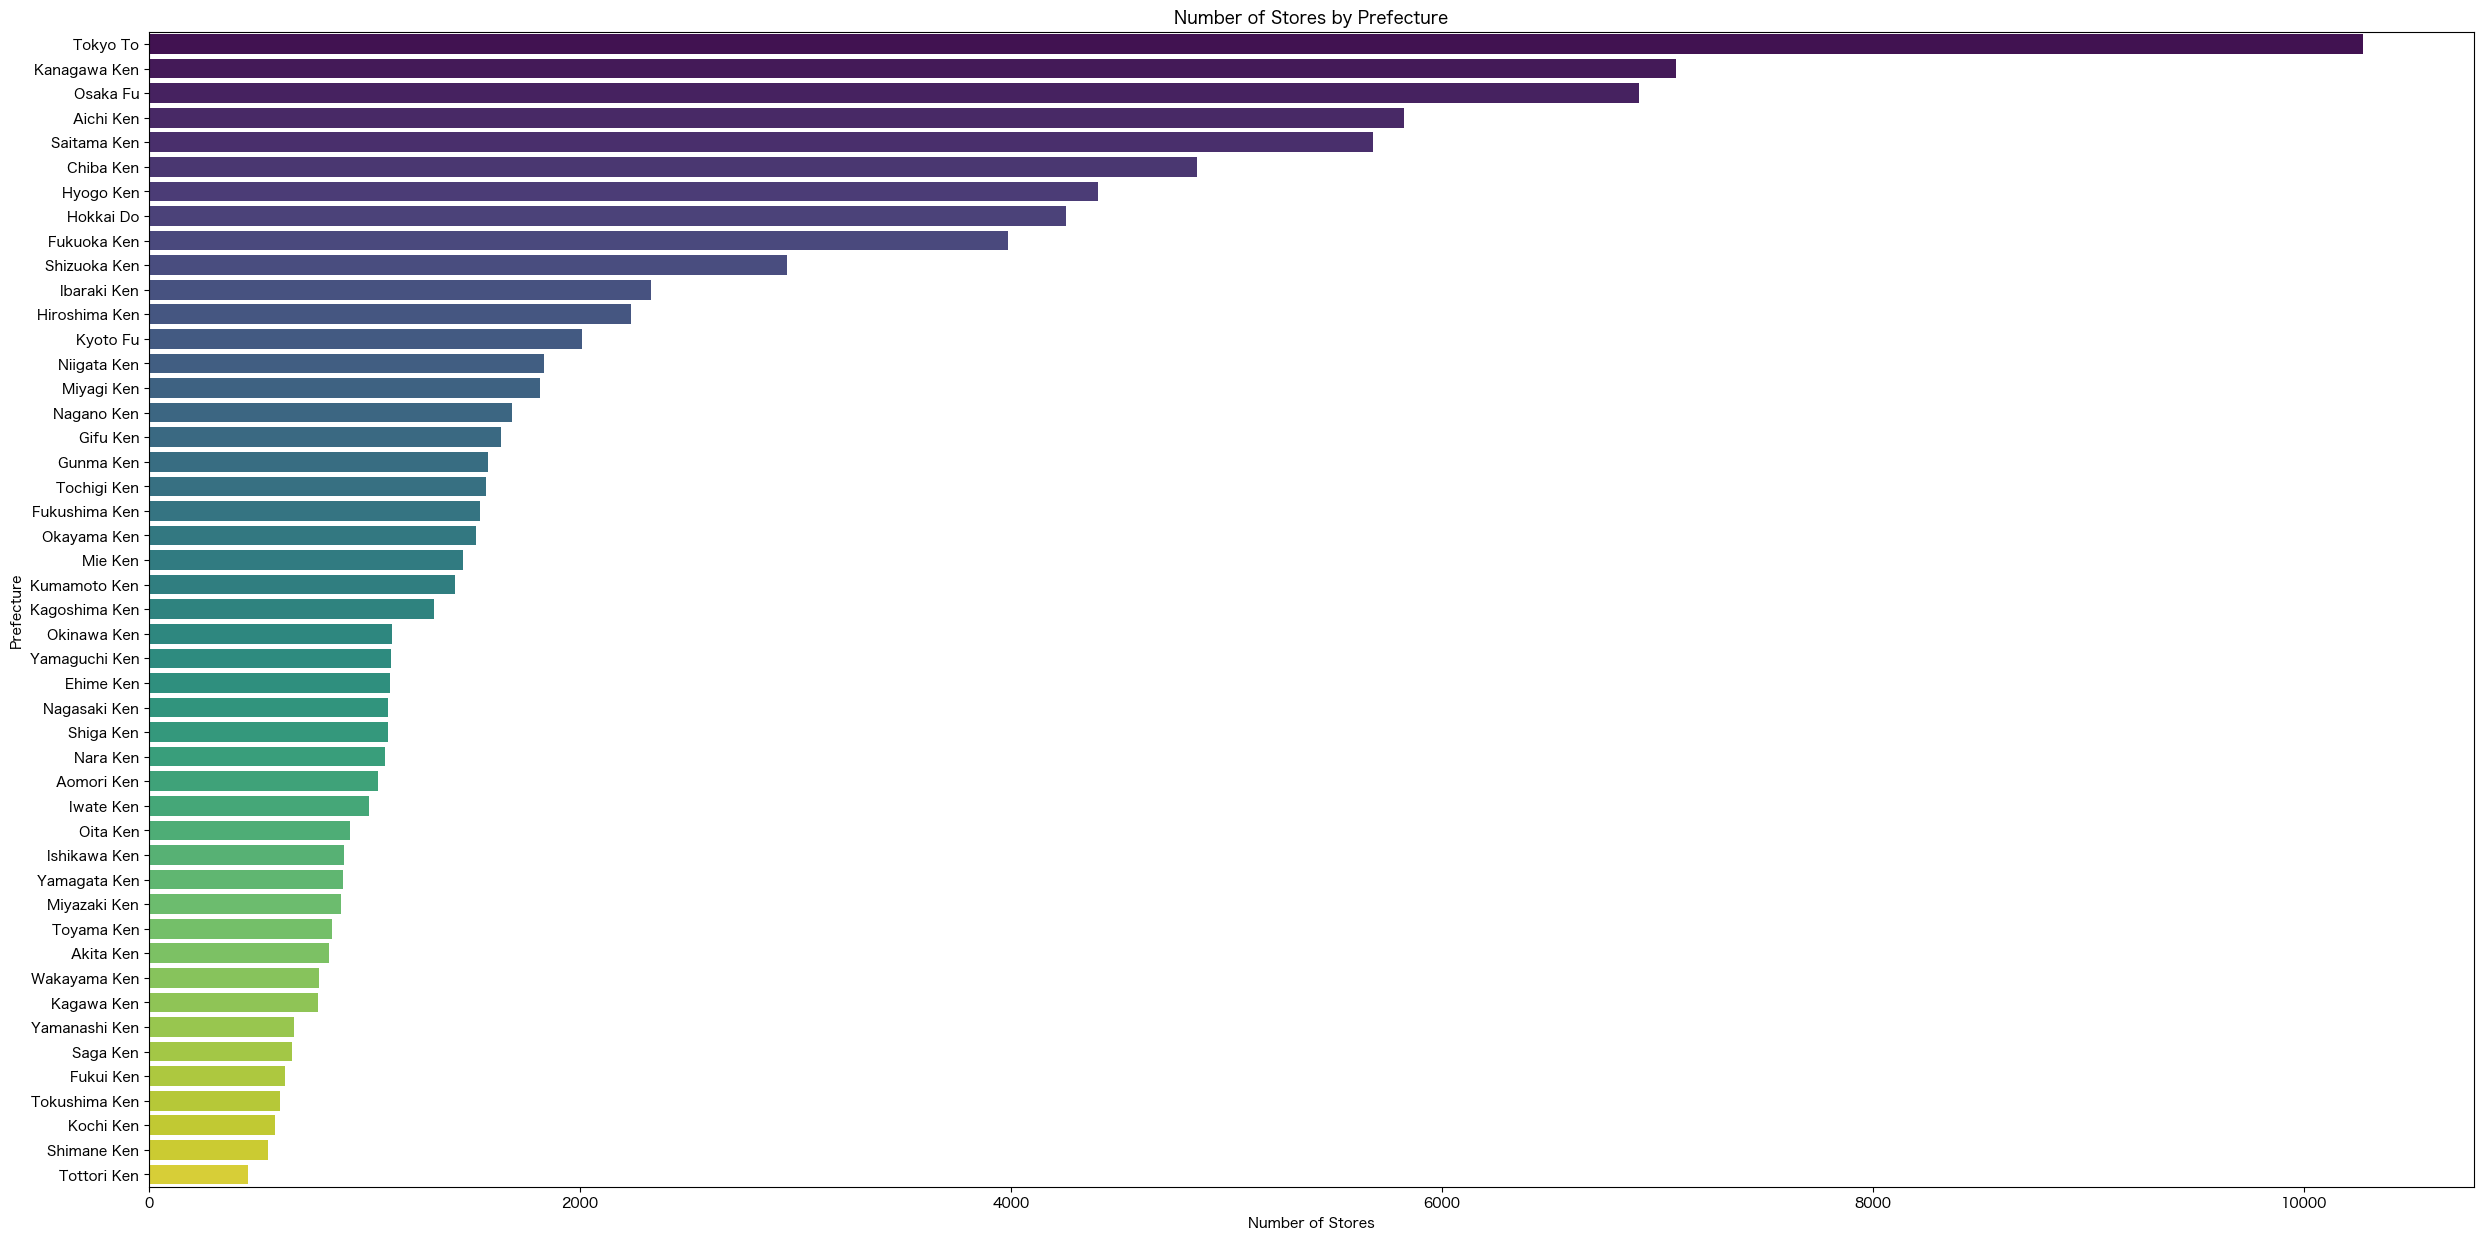

In [112]:
# Horizontal bar plot for prefectures
plt.figure(figsize=(30, 15))
sns.barplot(y=prefecture_distribution.index, x=prefecture_distribution.values, palette="viridis")
plt.title('Number of Stores by Prefecture')
plt.xlabel('Number of Stores')
plt.ylabel('Prefecture')
plt.show()



#### Horizontal bar plot for local administrative areas

/var/folders/lf/61ckn_jj7ms6gzszf65hx3y80000gn/T/ipykernel_34577/3523487607.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(y=laa_distribution.index, x=laa_distribution.values, palette="viridis")


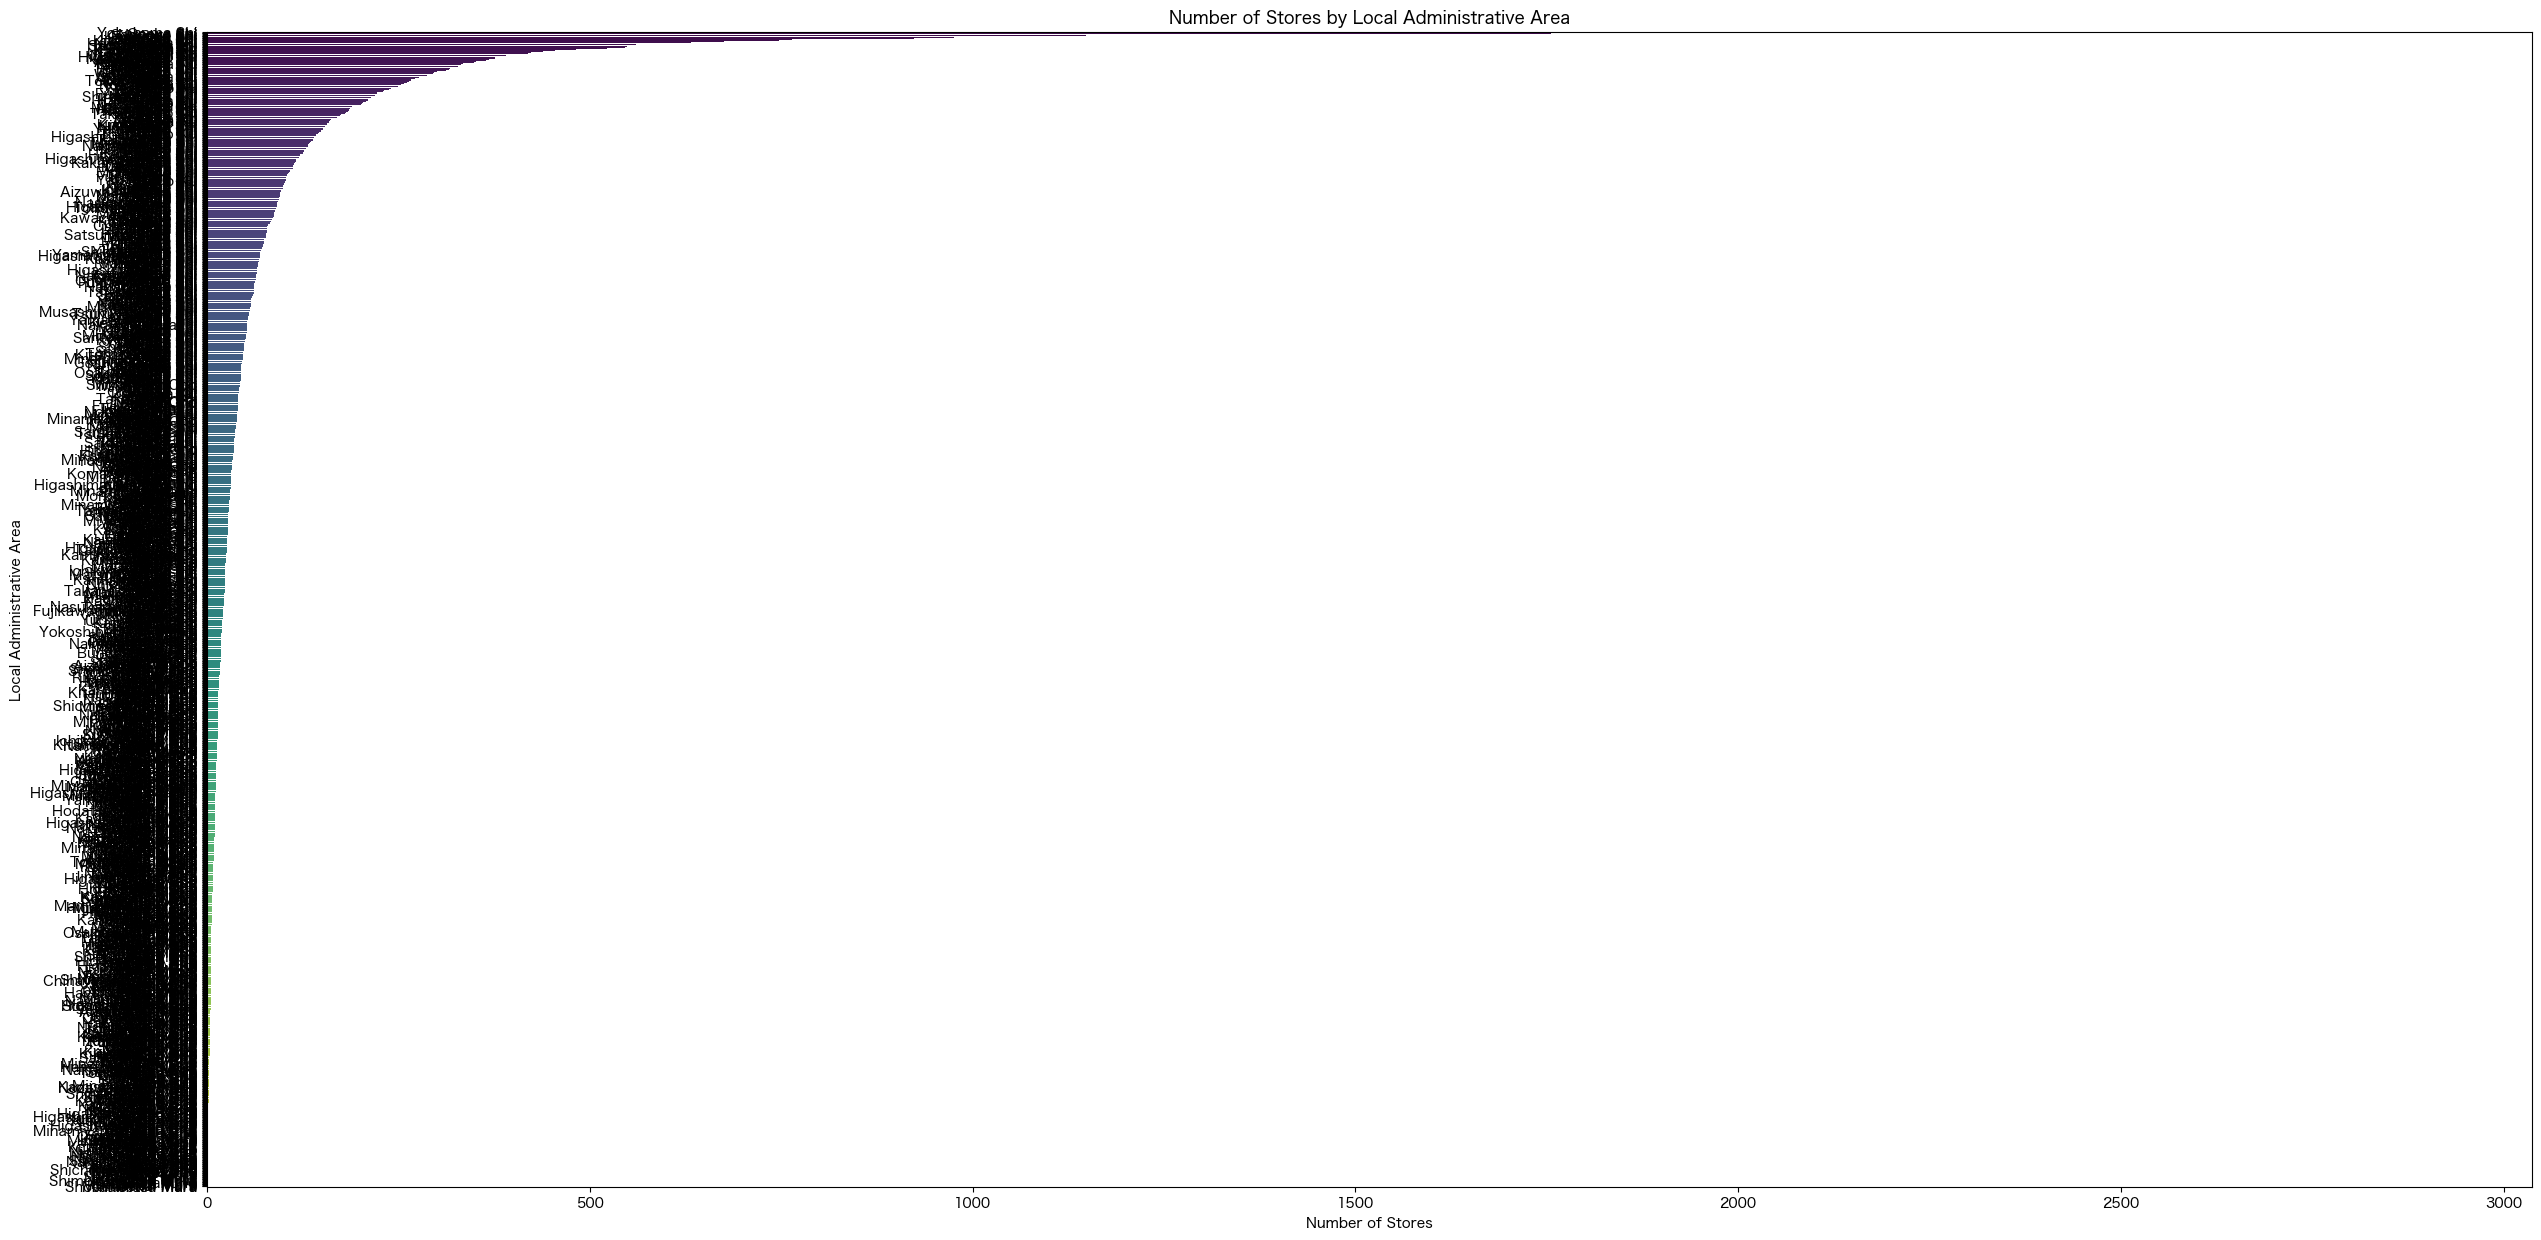

In [113]:
# # Horizontal bar plot for local administrative areas
plt.figure(figsize=(30,15))
sns.barplot(y=laa_distribution.index, x=laa_distribution.values, palette="viridis")
plt.title('Number of Stores by Local Administrative Area')
plt.xlabel('Number of Stores')
plt.ylabel('Local Administrative Area')
plt.show()

### same as above but with Pie Charts

Visualize proportions of top categories.

#### Distribution of Top Prefectures by Number of Store

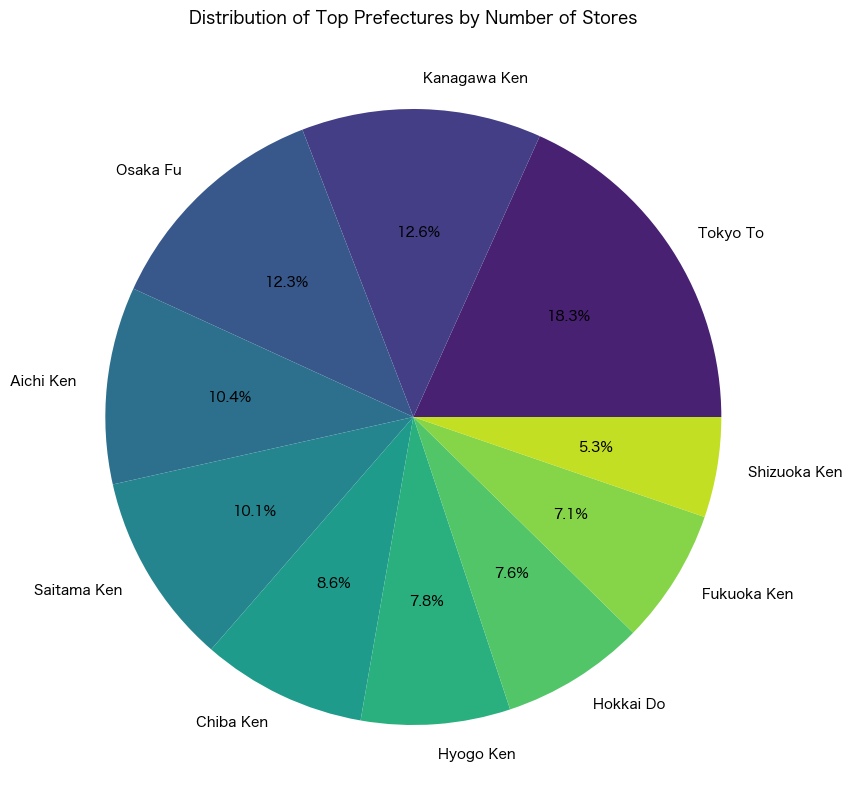

In [114]:
# Pie chart for top prefectures
plt.figure(figsize=(10, 10))
top_prefectures.plot(kind='pie', autopct='%1.1f%%', colors=sns.color_palette("viridis", top_n), legend=False)
plt.title('Distribution of Top Prefectures by Number of Stores')
plt.ylabel('')
plt.show()


#### Pie chart for top local administrative areas

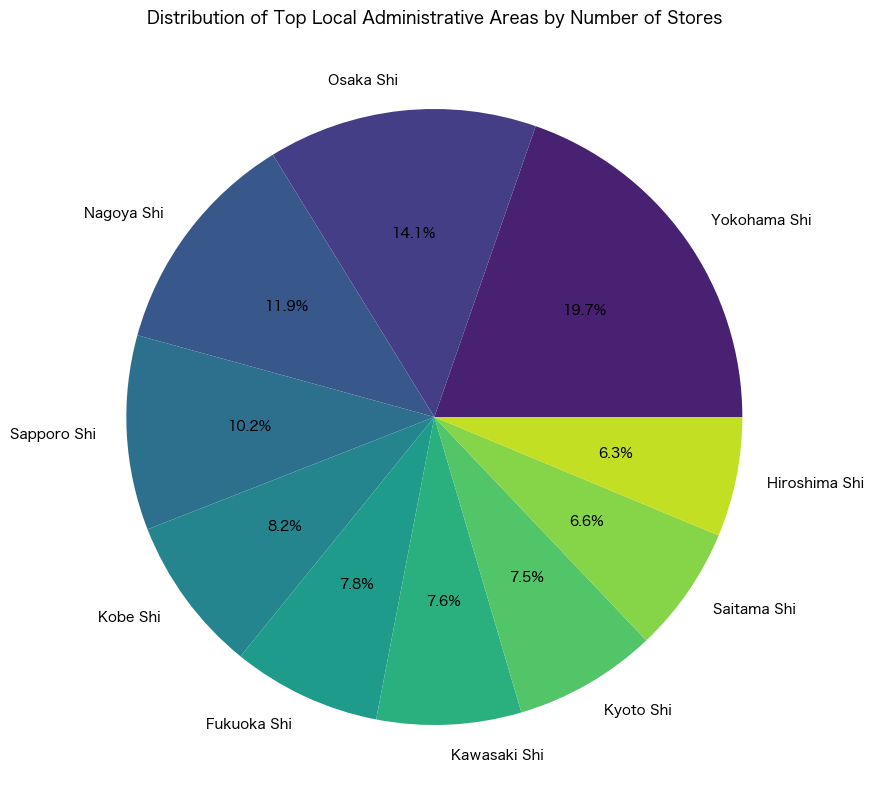

In [115]:
# Pie chart for top local administrative areas
plt.figure(figsize=(10, 10))
top_laa.plot(kind='pie', autopct='%1.1f%%', colors=sns.color_palette("viridis", top_n), legend=False)
plt.title('Distribution of Top Local Administrative Areas by Number of Stores')
plt.ylabel('')
plt.show()

## Step 3: Combined Analysis

Finally, let’s combine the datasets to perform a more comprehensive analysis.

1. GMV by Store Category

We can analyze how the GMV is distributed across different store categories.

/var/folders/lf/61ckn_jj7ms6gzszf65hx3y80000gn/T/ipykernel_34577/1569136812.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='amount', y='category', data=gmv_by_category, palette='viridis')


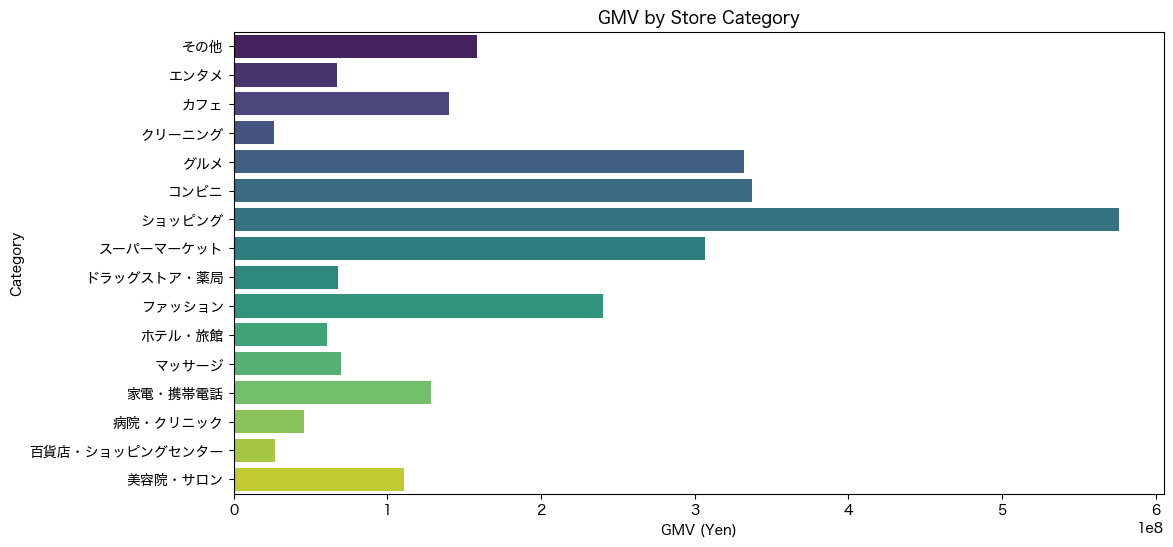

In [116]:
# Merge transactions with stores
transactions_stores = pd.merge(transactions, stores, left_on='store_id', right_on='id')

# Aggregate GMV by category
gmv_by_category = transactions_stores.groupby('category').agg({'amount': 'sum'}).reset_index()

# Plot GMV by category
plt.figure(figsize=(12, 6))
sns.barplot(x='amount', y='category', data=gmv_by_category, palette='viridis')
plt.title('GMV by Store Category')
plt.xlabel('GMV (Yen)')
plt.ylabel('Category')
plt.show()

2. GMV by User Age Group

Let’s analyze GMV across different age groups:

/var/folders/lf/61ckn_jj7ms6gzszf65hx3y80000gn/T/ipykernel_34577/1146103517.py:10: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  gmv_by_age_group = transactions_users.groupby('age_group').agg({'amount': 'sum'}).reset_index()
/var/folders/lf/61ckn_jj7ms6gzszf65hx3y80000gn/T/ipykernel_34577/1146103517.py:14: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='age_group', y='amount', data=gmv_by_age_group, palette='coolwarm')


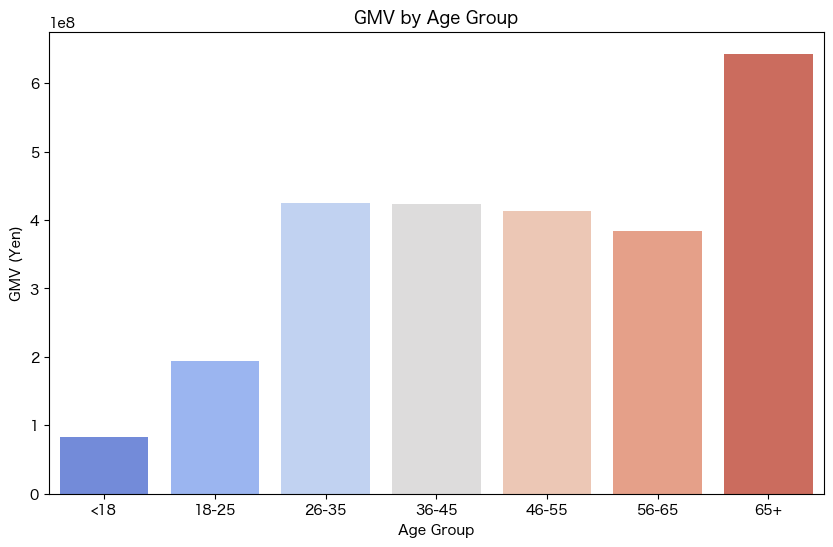

In [117]:
# Merge transactions with users
transactions_users = pd.merge(transactions, cleaned_users, left_on='user_id', right_on='id')

# Create age groups
bins = [0, 18, 25, 35, 45, 55, 65, 100]
labels = ['<18', '18-25', '26-35', '36-45', '46-55', '56-65', '65+']
transactions_users['age_group'] = pd.cut(transactions_users['age'], bins=bins, labels=labels)

# Aggregate GMV by age group
gmv_by_age_group = transactions_users.groupby('age_group').agg({'amount': 'sum'}).reset_index()

# Plot GMV by age group
plt.figure(figsize=(10, 6))
sns.barplot(x='age_group', y='amount', data=gmv_by_age_group, palette='coolwarm')
plt.title('GMV by Age Group')
plt.xlabel('Age Group')
plt.ylabel('GMV (Yen)')
plt.show()

### more detailed analysis of age group spends

/var/folders/lf/61ckn_jj7ms6gzszf65hx3y80000gn/T/ipykernel_34577/3034763967.py:13: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  age_group_gmv = merged_data.groupby('age_group').agg({'amount': 'sum'}).reset_index()
/var/folders/lf/61ckn_jj7ms6gzszf65hx3y80000gn/T/ipykernel_34577/3034763967.py:17: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='age_group', y='amount', data=age_group_gmv, palette="viridis")


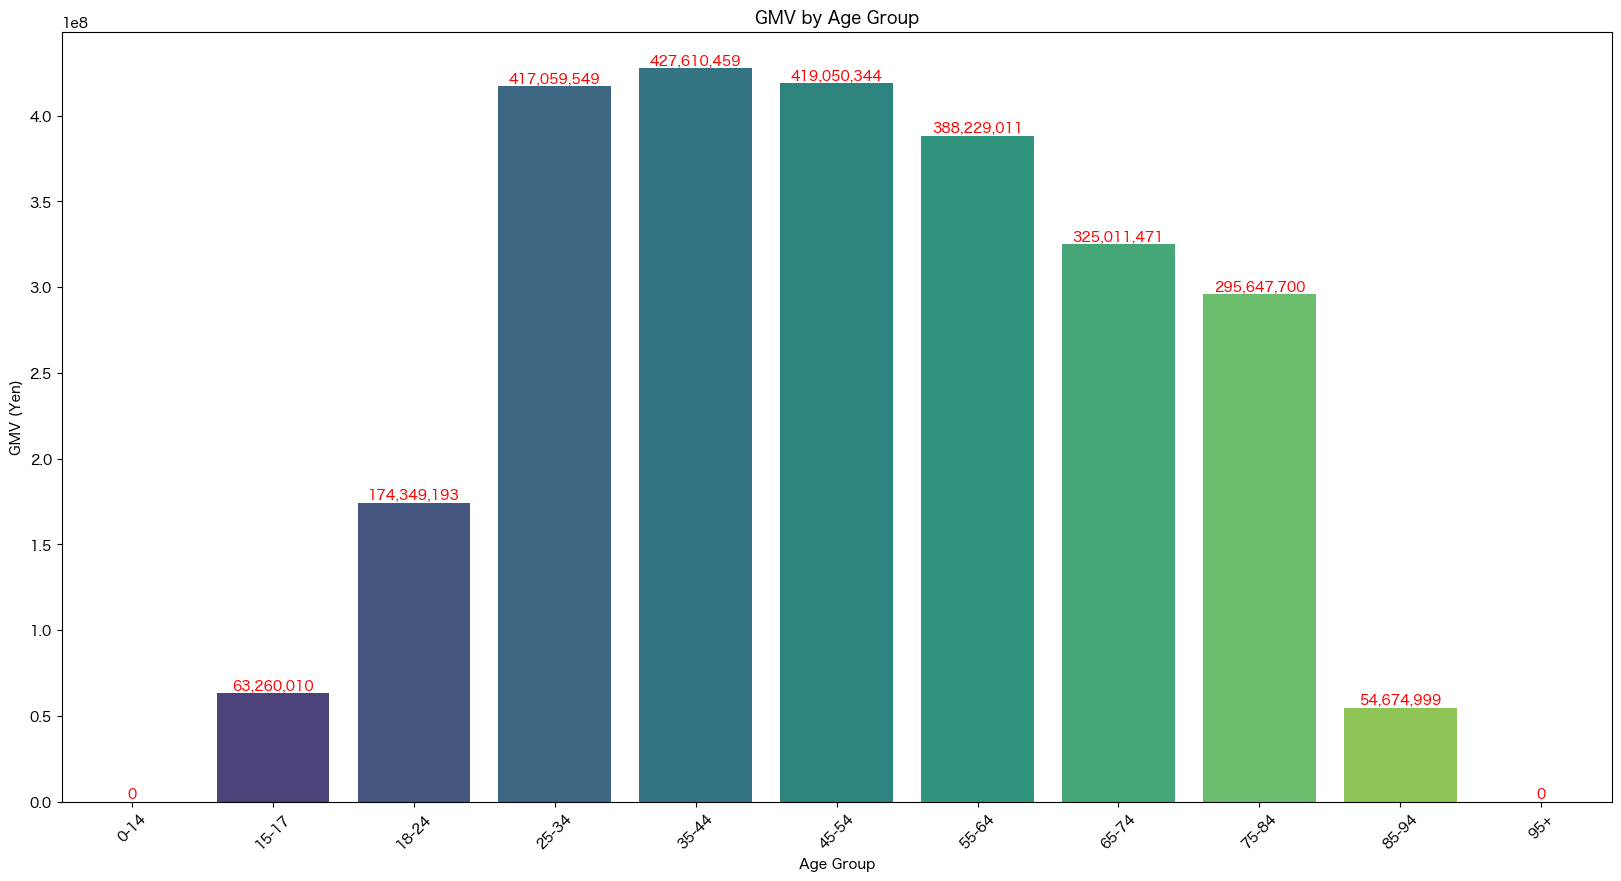

In [118]:
merged_data = pd.merge(transactions, cleaned_users, left_on='user_id', right_on='id')

# Create age groups
# bins = [0, 18, 25, 35, 45, 55, 65, 75, 85, 95, 105]
# labels = ['0-17', '18-24', '25-34', '35-44', '45-54', '55-64', '65-74', '75-84', '85-94', '95+']
# Create age groups with more granularity
bins = [0,15, 18, 25, 35, 45, 55, 65, 75, 85, 95, 105]
labels = ['0-14', '15-17', '18-24', '25-34', '35-44', '45-54', '55-64', '65-74', '75-84', '85-94', '95+']

merged_data['age_group'] = pd.cut(merged_data['age'], bins=bins, labels=labels, right=False)

# Calculate GMV by age group
age_group_gmv = merged_data.groupby('age_group').agg({'amount': 'sum'}).reset_index()

# Plot the GMV by age group
plt.figure(figsize=(20, 10))
sns.barplot(x='age_group', y='amount', data=age_group_gmv, palette="viridis")

# Add data labels on top of bars
for index, row in age_group_gmv.iterrows():
    plt.text(index, row['amount'], f'{row["amount"]:,}', ha='center', va='bottom', fontsize=10, color='red')

# Add labels and title
plt.title('GMV by Age Group')
plt.xlabel('Age Group')
plt.ylabel('GMV (Yen)')
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability

plt.show()